In [95]:
onedrive = r"C:\Users\mikek\OneDrive"

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path

sys.path.append(os.path.join(onedrive,r"Project\python-packages\sdtools"))

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.fluxes import *


%load_ext autoreload
%autoreload 2


print("Done")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done


# IO

In [3]:
write_file(casestore, "a3b.pkl")

a3b.pkl written


In [7]:
casestore = read_file("a3b.pkl")

a3b.pkl loaded


In [96]:
db = CaseDB()

toload = [
    # dict(name="puff", id="c7a-c4e_aa_fix", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = False),
    # dict(name="puff_tn", id="c8a-c7a_Tn30eV_sol", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = True),
    # dict(name="src_tn", id="d3a-d2b_Tn30eV_sol", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = True),
    # dict(name="src", id="d2a-d1a_aa_fix", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = False ),
    # dict(name="src_pfix", id="d4a-d2b_fix_psrc", grid="g3b2-fatter_newhypno.nc", unnormalise_geom = True),
    # dict(name="testbase", id="x-c2b-rtol1e-7", grid="g3b1f1-puff_1.2e21_3eV.nc", unnormalise_geom = True),
    dict(name="compasslike", id="x-c6-compasslike", grid="g3b1-lores_newhypno.nc", unnormalise_geom = True),
    # dict(name="compass_hid", id="x-c7-compass_highd", grid="g3b1-lores_newhypno.nc", unnormalise_geom = True),
    # dict(name="compass_hid_neumann", id="x-c7b-highd_allneumann", grid="g3b1-lores_newhypno.nc", unnormalise_geom = True),
    dict(name="st40_process", id="x-c8-st40_process", grid="g3b1-lores_newhypno.nc", unnormalise_geom = True),
    dict(name="no_neutrals", id="x-c8b-no_neutrals", grid="g3b1-lores_newhypno.nc", unnormalise_geom = True),
    # dict(name="no_par_diff", id="x-c8c-no_par_diff", grid="g3b1-lores_newhypno.nc", unnormalise_geom = True),
    # dict(name="no_upwind", id="x-c8d-no_upwind", grid="g3b1-lores_newhypno.nc", unnormalise_geom = True),
    # dict(name="src", id="x-c9-noneut_coresrc", grid="g3b1f2-mbtest.nc", unnormalise_geom = True),
    # dict(name="src_fromscratch", id="x-c9b-fromscratch", grid="g3b1f2-mbtest.nc", unnormalise_geom=True),
]

casestore = dict()

for case in toload:
    casestore[case["name"]] = Load.case_2D(db.casepaths[case["id"]], gridfilepath = db.gridpaths[case["grid"]],
                                           double_load = False, keep_xboundaries = True,
                                           unnormalise_geom = case["unnormalise_geom"])
    
casepath = r"C:\Users\mikek\OneDrive\Project\BOUT-hermes-dev\compass-test-68x96\06"
gridpath = r"C:\Users\mikek\OneDrive\Project\BOUT-hermes-dev\compass-test-68x96\compass-wide-68x96-cellcorners.grd.nc"

casestore["compass"] = Load.case_2D(
    casepath, 
    gridpath,
    double_load = False, keep_xboundaries = True)

CHECK: Total domain volume is 1.598E+00 [m3]
CHECK: Total domain volume is 1.598E+00 [m3]
No recycling partner found for d+
CHECK: Total domain volume is 1.598E+00 [m3]


C:\Users\mikek\OneDrive\Project\python-packages\xBOUT\xbout\load.py:753: UserWarning: Trying to open a large number of files - setting xarray's `file_cache_maxsize` global option to 192 to accommodate this. Recommend using `xr.set_options(file_cache_maxsize=NUM)` to explicitly set this to a large enough value.
  warn(


--> g11, g_22, dx, dy and J will not be unnormalised
CHECK: Total domain volume is 4.743E-01 [m3]


In [5]:
ds = casestore["testbase"].ds

len(ds.coords["x"])

20

In [ ]:
ds = casestore["puff_tn"].ds.copy()
# ds = casestore["src"].ds.copy()
# ds = calculate_radial_fluxes(ds)
# ds = calculate_target_fluxes(ds)

calculate_particle_balance(ds)
calculate_heat_balance(ds)

In [116]:
casestore["src_pfix"].unnormalise(unnormalise_geom =True)

In [6]:
for name in casestore:
    casestore[name].ds = calculate_radial_fluxes(casestore[name].ds)
    casestore[name].ds = calculate_target_fluxes(casestore[name].ds)

# ds = calculate_radial_fluxes(ds)
# ds = calculate_target_fluxes(ds)

In [122]:
from hermes3.fluxes import *
plt.close("all")
# fig, ax = plt.subplots(figsize=(6,3), dpi = 150)
ds = casestore["compass"].ds
ds = calculate_heat_balance(ds)
show_heat_balance_table(ds)

ds = calculate_particle_balance(ds)
show_particle_balance_table(ds)


# ds["hf_int_total_net"].plot(ax = ax)
# ax.grid()

---------------------------------------
HEAT BALANCE
---------------------------------------


c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Domain volume: 1.598e+00 [m3]
Power imbalance: -0.973 [MW]
Power imbalance as frac of core + source: -61.37%
---------------------------------------
Total fluxes in [MW]:


---------------------------------------
PARTICLE BALANCE
---------------------------------------
Domain volume: 1.598e+00 [m3]
Particle imbalance: -7.127e+20 [s-1]
Particle imbalance as frac of core + source: -17.68%
---------------------------------------
Total fluxes in [s-1]:


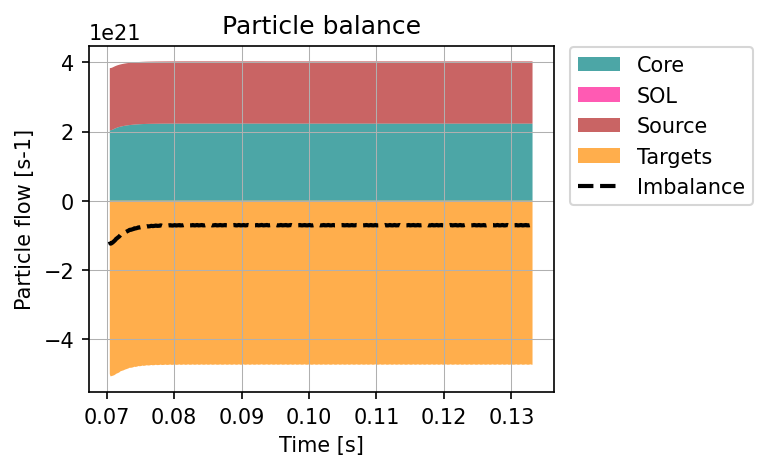

In [120]:
fig, ax = plt.subplots(figsize=(4,3), dpi = 150)

# ds["pf_int_core_net"].plot(ax = ax, label = "Core")
# ds["pf_int_sol_net"].plot(ax = ax, label = "SOL")
# ds["pf_int_targets_net"].plot(ax = ax, label = "Targets")
# ds["pf_int_src_net"].plot(ax = ax, label = "Source")

m = ds.metadata
data_pos = [ds["pf_int_core_net"], ds["pf_int_sol_net"], ds["pf_int_src_net"]]
labels_pos = ["Core", "SOL", "Source"]

data_neg = [ds["pf_int_targets_net"]]
labels_neg = ["Targets"]

# colors = [plt.get_cmap("Spectral_r")(x/len(data_pos.append(data_neg))) for x in range(len(data_pos.append(data_neg)))]

ax.stackplot(ds.coords["t"], data_pos, labels = labels_pos, baseline = "zero", colors = ["teal", "deeppink", "firebrick"], alpha = 0.7)

ax.stackplot(ds.coords["t"], data_neg, labels = labels_neg, baseline = "zero", colors = ["darkorange"], alpha = 0.7)

ax.plot(ds.coords["t"], ds["pf_int_total_net"], lw = 2, ls = "--", c = "k", label = "Imbalance")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Particle flow [s-1]")
ax.set_title("Particle balance")
fig.legend(bbox_to_anchor = (1.25,0.9), loc = "upper right")
ax.grid(lw = 0.5)

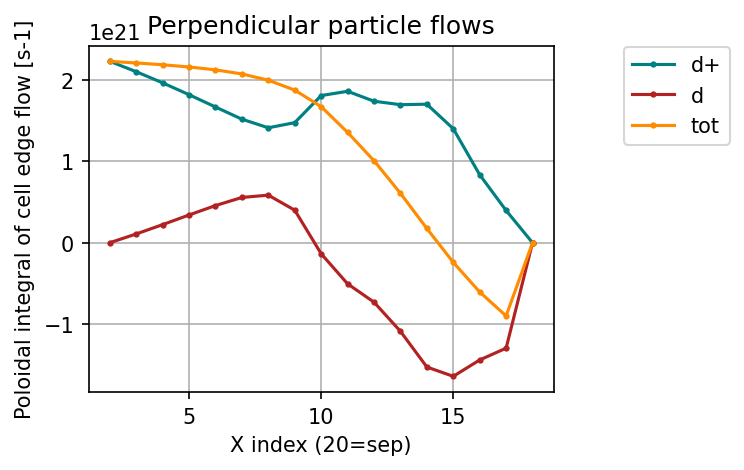

In [121]:


fig, ax = plt.subplots(figsize=(4,3), dpi = 150)
d = ds.isel(t=-1, x=slice(2,-2)).sum("theta")

Fi = d["pf_perp_diff_L_d+"].values
Fi = np.concatenate([Fi, [d["pf_perp_diff_R_d+"][-1].values]])

Fn = d["pf_perp_diff_L_d"].values
Fn = np.concatenate([Fn, [d["pf_perp_diff_R_d"][-1].values]])

Ft = Fi + Fn
ax.plot(ds.coords["x"][2:-1], Fi,  marker = "o", label = "d+", ms = 2, c = "teal")
ax.plot(ds.coords["x"][2:-1], Fn,  marker = "o", label = "d", ms = 2, c = "firebrick")
ax.plot(ds.coords["x"][2:-1], Ft,  marker = "o", label = "tot", ms = 2, c = "darkorange")
# ax2 = ax.twinx()
# ax2.plot(d.coords["x"], d["Sd+_iz"],  marker = "o", label = "iz (RHS)", ms = 0, c = "grey", ls = "--")

ax.set_title("Perpendicular particle flows")
ax.set_xlabel("X index (20=sep)")
ax.set_ylabel("Poloidal integral of cell edge flow [s-1]")
ax.grid()
fig.legend(loc = "upper left", bbox_to_anchor=(1.0, 0.9))

In [7]:
from hermes3.plotting import lineplot

In [14]:
casestore.keys()

dict_keys(['puff', 'puff_tn', 'src_pfix', 'testbase', 'compass'])

In [22]:
"t" in casestore["puff"].ds.isel(t=-1).dims.keys()

False

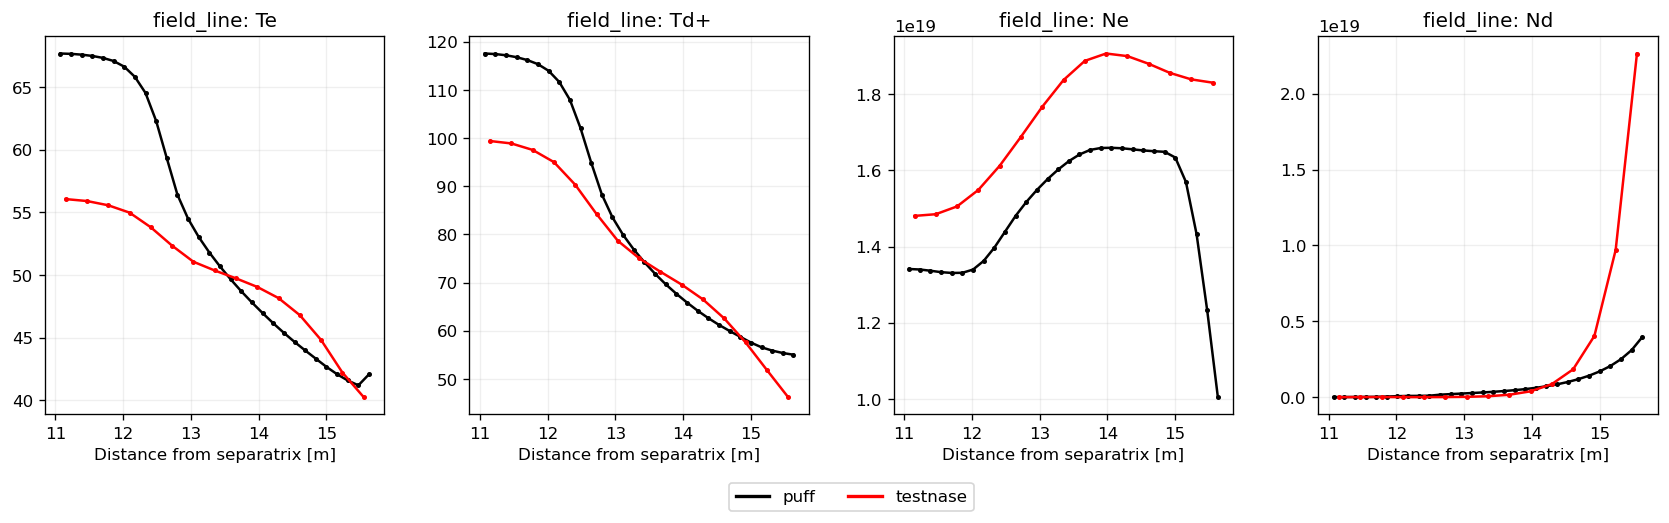

In [94]:
lineplot(
    {"puff":casestore["puff"].ds,
     "testnase":casestore["testbase"].ds},
    params = ["Te", "Td+", "Ne", "Nd"],
    regions = ["field_line"],
    scale = "linear",
    dpi = 120
)

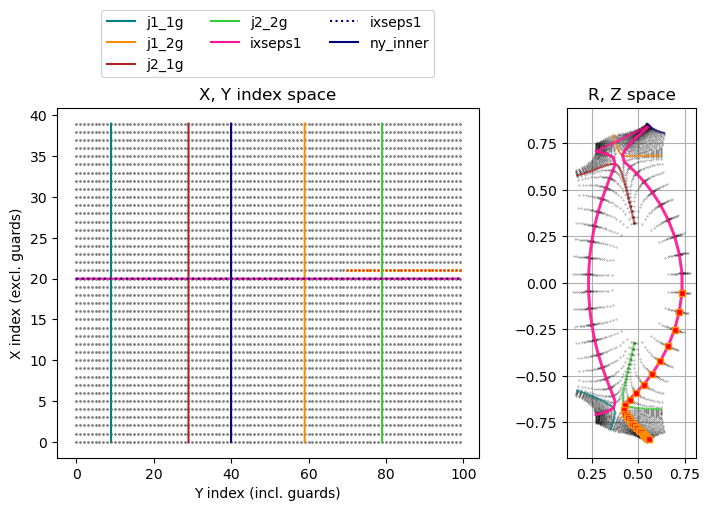

In [90]:
ds = casestore["puff"].ds

plot_selection(ds, ds.hermesm.select_custom_sol_ring(ds.metadata["ixseps1"], "outer_lower"))

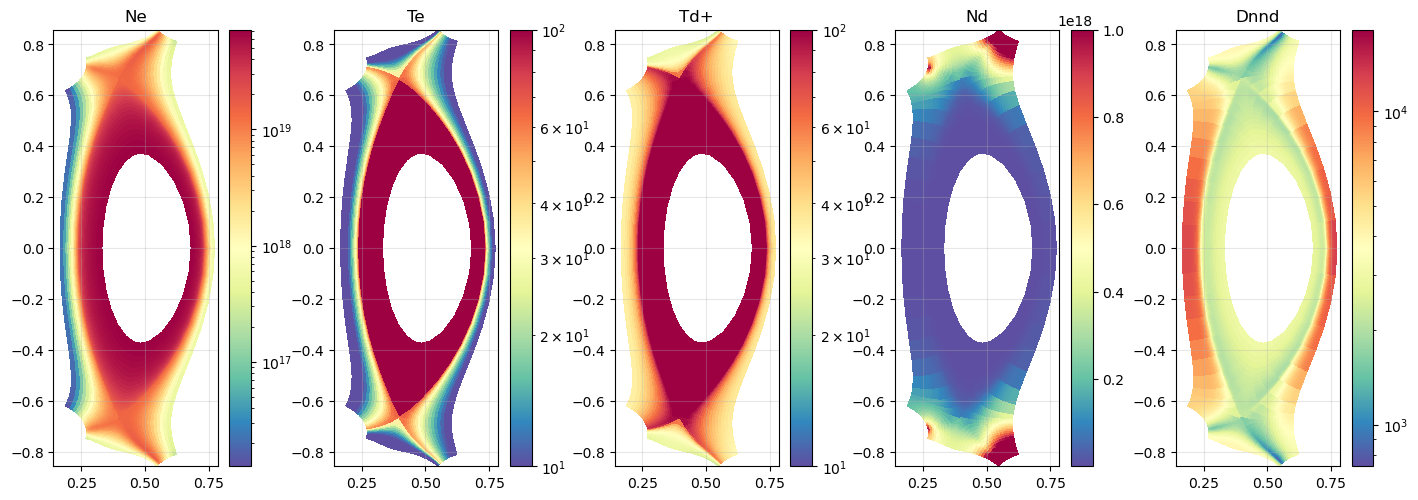

In [79]:
self = Monitor2D(casestore["puff"], mode = "polygon", windows = [["Ne", "Te", "Td+", "Nd", "Dnnd"]], 
                 settings = {
                    "all":{"view":None, "dpi": 100},
                    "Ne":{"vmin":None, "vmax":None},
                    "Te":{"log":True, "vmin":10, "vmax":100},
                    "Td+":{"log":True, "vmin":10, "vmax":100},
                    "Nd":{"log":False, "vmax":1e18,
                    }})

True


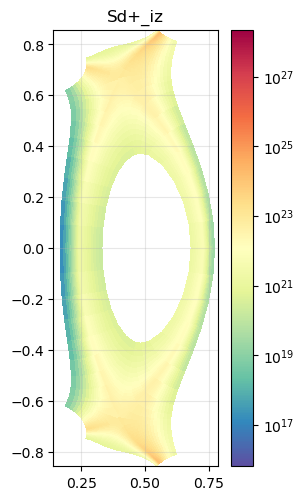

In [76]:
self = Monitor2D(casestore["puff"], mode = "polygon", windows = [["Sd+_iz"]], 
                 settings = {
                    "all":{"view":None, "dpi": 100},
                    "Ne":{"vmin":None, "vmax":None},
                    "Te":{"log":True, "vmin":10, "vmax":100},
                    "Td+":{"log":True, "vmin":10, "vmax":100},
                    "Nd":{"log":False, "vmax":1e18,
                    }})

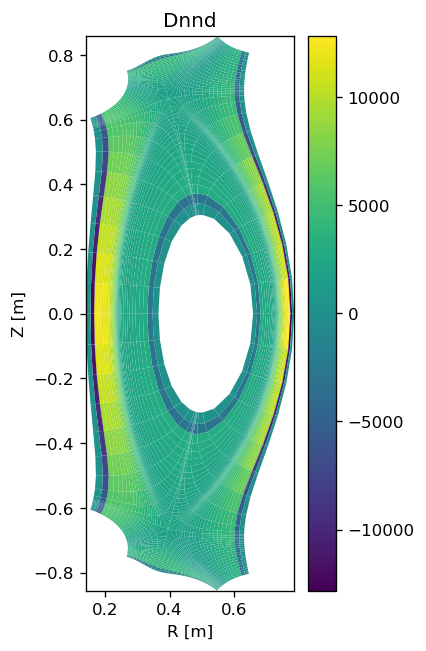

In [73]:
ds = casestore["puff"].ds

# ds["Dnnd"].hermesm.clean_guards().isel(t=-1).bout.polygon(antialias=True)
ds["Dnnd"].isel(t=-1).bout.polygon(antialias=True)

In [62]:
ds.metadata["MXG"]

2

ValueError: Dimensions {'t'} do not exist. Expected one or more of ('x', 'theta')

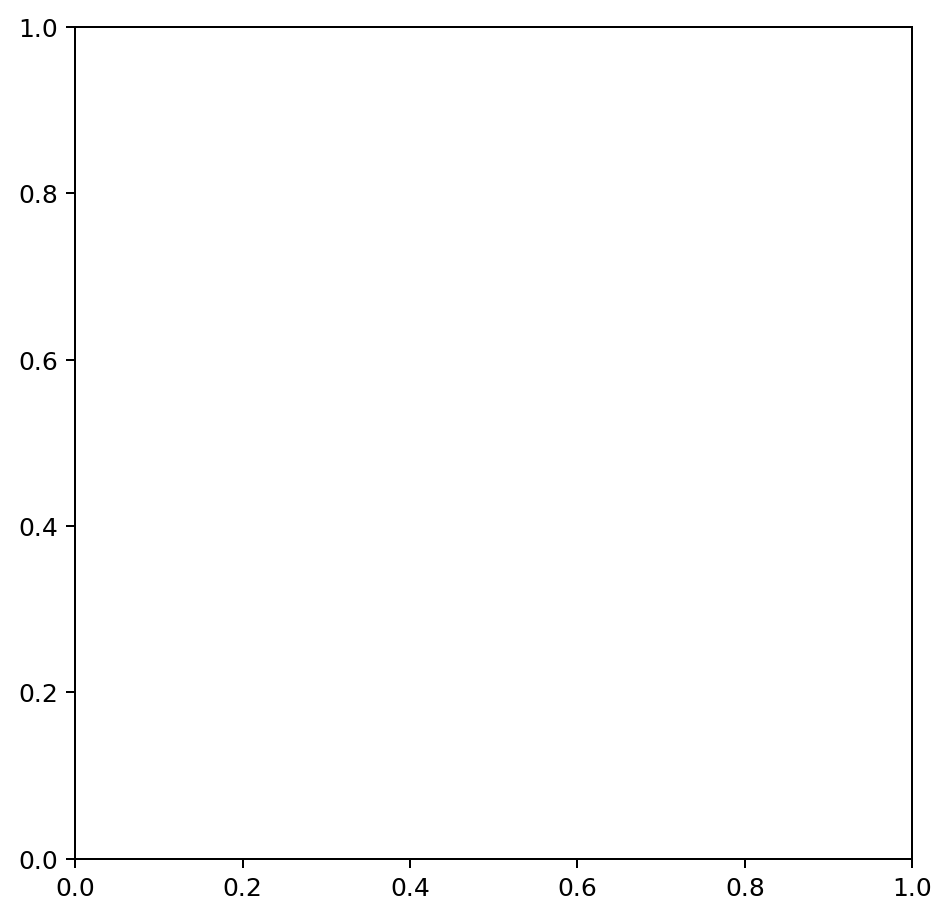

In [57]:
Ee = (ds["Ne"] * ds["Te"] * constants("k_b")) * 3/2
Ei = ((ds["Nd+"] * ds["Td+"] * constants("k_b")) + (0.5 * ds["Vd+"] * constants("mass_p")*2 )) * 3/2 

plt.close("all")
fig, ax = plt.subplots(figsize=(6,6), dpi = 180)

(Ei+Ee).isel(t=-1).bout.polygon(ax = ax, cmap = "Spectral_r", antialias = True, vmax = 0.05)

c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


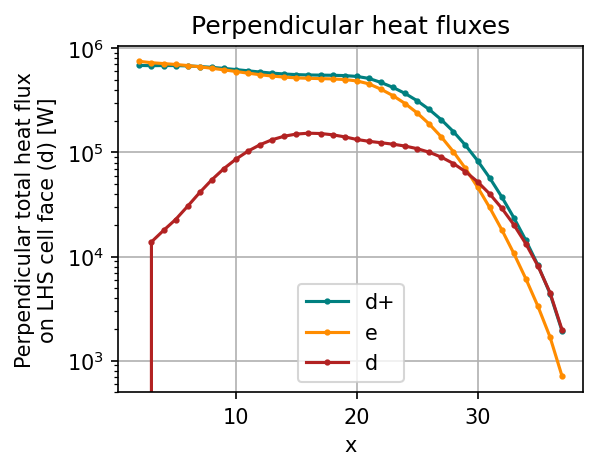

In [269]:
plot_perp_heat_fluxes(casestore["puff"].ds.isel(t=-1))
# plot_perp_particle_fluxes(casestore["puff_tn"].ds.isel(t=-1))

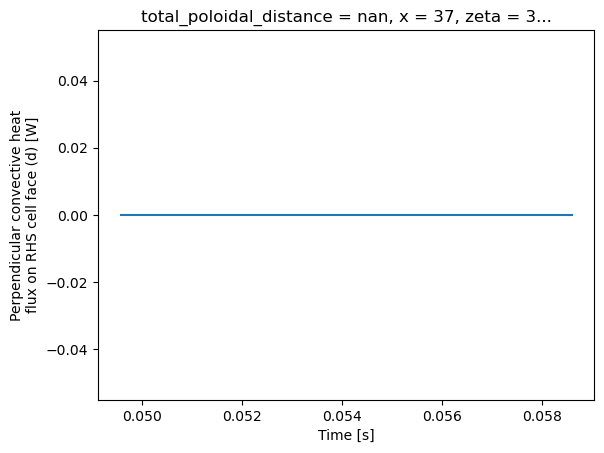

In [276]:
ds.hermesm.select_region("sol_edge")["hf_perp_conv_R_d"].sum("theta").plot()

In [125]:
ds = casestore["puff_tn"].ds.copy()
# ds = casestore["src"].ds.copy()
# ds = calculate_radial_fluxes(ds)
# ds = calculate_target_fluxes(ds)

calculate_particle_balance(ds)
calculate_heat_balance(ds)

---------------------------------------
PARTICLE BALANCE
---------------------------------------
Recycling fraction: 98.53%
Domain volume: 1.556e+00


---------------------------------------
HEAT BALANCE
---------------------------------------


c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Domain volume: 1.556e+00 [m3]
Power imbalance: 177,550 [W]
Power imbalance as frac of core + source: 11.09%


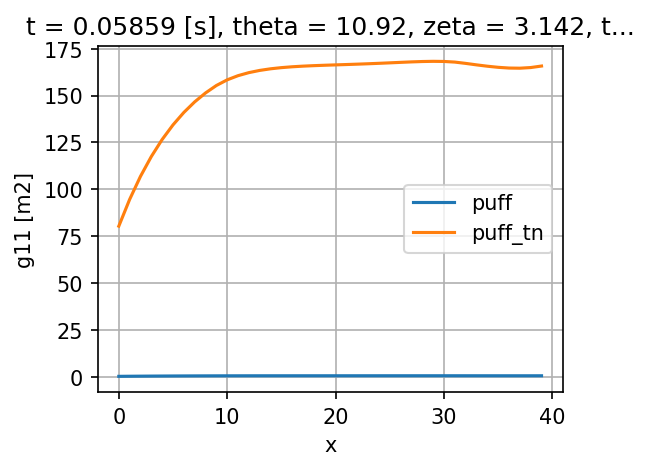

In [100]:
fig, ax = plt.subplots(figsize=(4,3), dpi = 150)

for name in ["puff", "puff_tn"]:
    ds = calculate_radial_fluxes(casestore[name].ds)
    ds = casestore[name].ds.isel(t=-1)
    ds = ds.hermesm.select_region("outer_midplane_a")
    
    L, _  =  Div_a_Grad_perp_upwind_fast(ds, ds[f"anomalous_D_d+"], ds[f"Nd+"])
    # L = L.hermesm.select_region("outer_midplane_a")
    
    # L.plot(ax = ax, label = name)
    # ds["anomalous_D_d+"].hermesm.select_region("outer_midplane_a").plot(ax = ax, label = name)
    # print(casestore[name].ds["g_22"].values.sum())
    # print(ds["g"])
    # L.hermesm.select_region("outer_midplane_a").plot(ax = ax, label = name)
    ds["g11"].plot(ax = ax, label = name)
    

ax.grid()
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(4,3), dpi = 150)
ds = casestore["puff"].ds.copy()
ds = calculate_radial_fluxes(ds)
# d = ds.isel(t=-1).isel(x=slice(2,-2)).hermesm.select_region("outer_midplane_a")
d = ds.isel(t=-1).isel(x=slice(2,-2)).sum("theta")
d["hf_perp_conv_L_d+"].plot(ax = ax, marker = "o", label = "d+", ms = 2)
d["hf_perp_conv_L_e"].plot(ax = ax, marker = "o", label = "e", ms = 2)
# d["hf_perp_conv_L_d"].plot(ax = ax, marker = "o", label = "d", ms = 2)
ax.set_title("Perpendicular heat fluxes")
ax.grid()
ax.legend()

In [121]:
ds = casestore["src_pfix"].ds.copy()
ds = calculate_radial_fluxes(ds)
calculate_particle_balance(ds)
calculate_heat_balance(ds)

---------------------------------------
PARTICLE BALANCE
---------------------------------------
Recycling fraction: -211.09%
Domain volume: 1.556e+00


---------------------------------------
HEAT BALANCE
---------------------------------------


c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Domain volume: 1.556e+00 [m3]
Power imbalance: 1,647,324 [W]
Power imbalance as frac of core + source: 93.57%


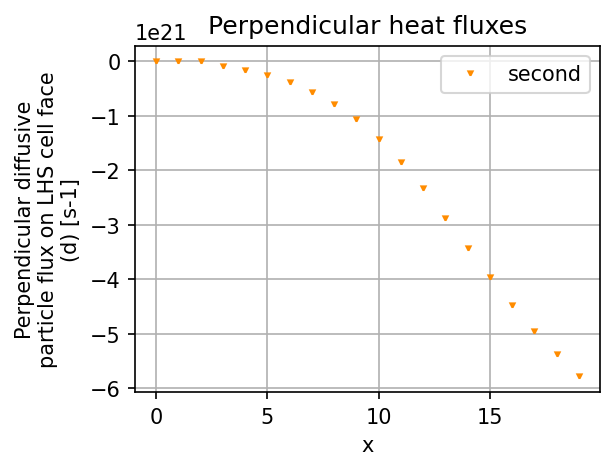

In [127]:
m = ds.metadata
Pnorm = m["Nnorm"] * m["Tnorm"] * constants("q_e")
ds = casestore["puff_tn"].ds.copy()
ds = calculate_radial_fluxes(ds)
# ds = ds.isel(t=-1, x = slice(2,-2))
ds = ds.isel(t=-1)

name = "d"
Plim = ds[f"P{name}"].where(ds[f"P{name}"]>0, 1e-8 * Pnorm) # Limit P to 1e-8 in normalised units
        
L, _  =  Div_a_Grad_perp_fast(ds, ds[f"Dnn{name}"]*ds[f"N{name}"], np.log(Plim))
L2, _ = Div_a_Grad_perp_fast_broken(ds, ds[f"Dnn{name}"]*ds[f"N{name}"], np.log(Plim))

L = L.hermesm.select_region("core").sum("theta")
L2 = L2.hermesm.select_region("core").sum("theta")
x = ds["pf_perp_diff_L_d"].hermesm.select_region("core").sum("theta")

fig, ax = plt.subplots(figsize=(4,3), dpi = 150)

# L.plot(ax = ax, marker = "o", lw = 0, label = "L", ms = 2, color = "navy")
x.plot(ax = ax, marker = "v", lw = 0, label = "second", ms = 2, color = "darkorange")
ax.set_title("Perpendicular heat fluxes")
ax.grid()
ax.legend()


In [30]:
%matplotlib widget

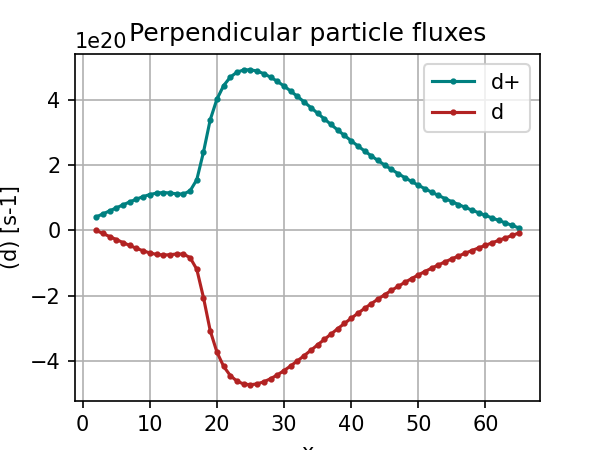

In [115]:
plot_perp_particle_fluxes(ds)

# PF debug

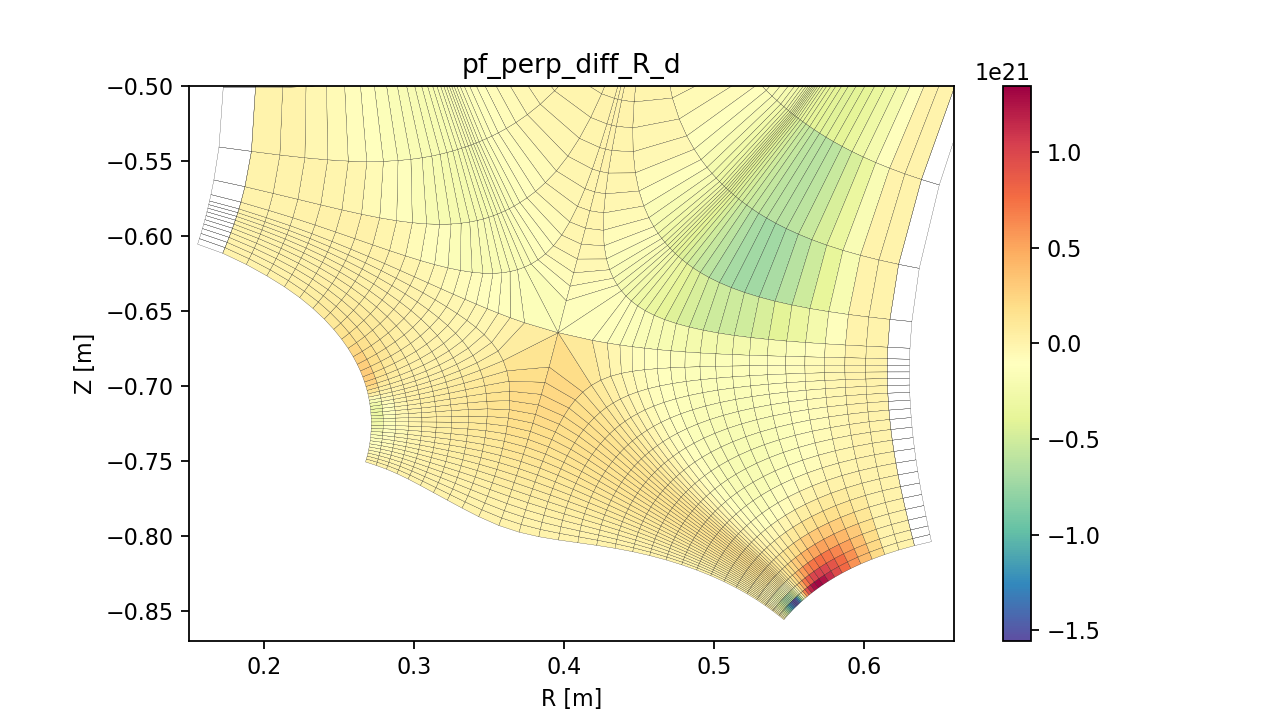

In [133]:
plt.close("all")
fig, ax = plt.subplots(figsize=(8,4.5), dpi = 160)

ds = casestore["puff_tn"].ds.copy()
name = "d+"


Dnnd_fix = ds["Dnnd"].copy()
Dnnd_fix[{"x":1}] = Dnnd_fix[{"x":2}]
Dnnd_fix[{"x":0}] = Dnnd_fix[{"x":2}]
Dnnd_fix[{"x":-1}] = Dnnd_fix[{"x":-3}]
Dnnd_fix[{"x":-2}] = Dnnd_fix[{"x":-3}]

Nd_fix = ds["Nd"].copy()
Nd_fix[{"x":1}] = Nd_fix[{"x":2}]
Nd_fix[{"x":0}] = Nd_fix[{"x":2}]
Nd_fix[{"x":-1}] = Nd_fix[{"x":-3}]
Nd_fix[{"x":-2}] = Nd_fix[{"x":-3}]

Pd_fix = ds["Pd"].copy()
Pd_fix[{"x":1}] = Pd_fix[{"x":2}]
Pd_fix[{"x":0}] = Pd_fix[{"x":2}]
Pd_fix[{"x":-1}] = Pd_fix[{"x":-3}]
Pd_fix[{"x":-2}] = Pd_fix[{"x":-3}]
# Dnnd_fix.isel(x = slice(None,1)) = Dnnd_fix.isel(x=2)

m = ds.metadata
Pnorm = m["Nnorm"] * m["Tnorm"] * constants("q_e")
Plim = ds[f"Pd"].where(ds[f"Pd"]>0, 1e-8 * Pnorm) # Limit P to 1e-8 in normalised units
Plim_fix = Pd_fix.where(Pd_fix>0, 1e-8 * Pnorm)

# fn, _  =  Div_a_Grad_perp_fast(ds, ds[f"Dnnd"]*ds[f"Nd"], np.log(Plim))
# fni, _ =  Div_a_Grad_perp_upwind_fast(ds, ds[f"Dnnd"]*ds[f"Nd"], np.log(Plim))
# fn2, _  =  Div_a_Grad_perp_upwind_fast(ds, ds[f"Dnnd"]*ds[f"Nd"], Plim_fix)
# fn2, _  =  Div_a_Grad_perp_upwind_fast(ds, Dnnd_fix*Nd_fix, Plim_fix)
fn3, _  =  Div_a_Grad_perp_fast(ds, Dnnd_fix*Nd_fix, Plim_fix)
# fi, _  =  Div_a_Grad_perp_upwind_fast(ds, ds[f"anomalous_D_d+"], ds[f"Nd+"])

def plot(x):
    x.isel(t=-1).bout.polygon(ax = ax, cmap = "Spectral_r", antialias = True, linewidth = 0.1, vmax = None)
    
# plot(fi)
# plot(ds[f"anomalous_D_{name}"])
# plot(ds[f"Nd"])
# plot(ds[f"Dnnd"])
# plot(Dnnd_fix)
# plot(ds[f"Nd"])
# plot(ds[f"Dnnd"]*ds[f"Nd"])
# plot(Plim)
# plot(ds["Pd+"])
# plot(fni)
# plot(fn2)
# plot(Nd_fix)
# plot(Pd_fix)
# plot(ds["fn2"].hermesm.clean_guards())
# plot(np.log(Plim))
plot(ds["pf_perp_diff_R_d"])
# plot(fn3)
# L.isel(t=-1).hermesm.clean_guards().bout.polygon(ax = ax, cmap = "Spectral_r", antialias = True, linewidth = 0.1)
camera_view(ax, "lower2")

# HF debug

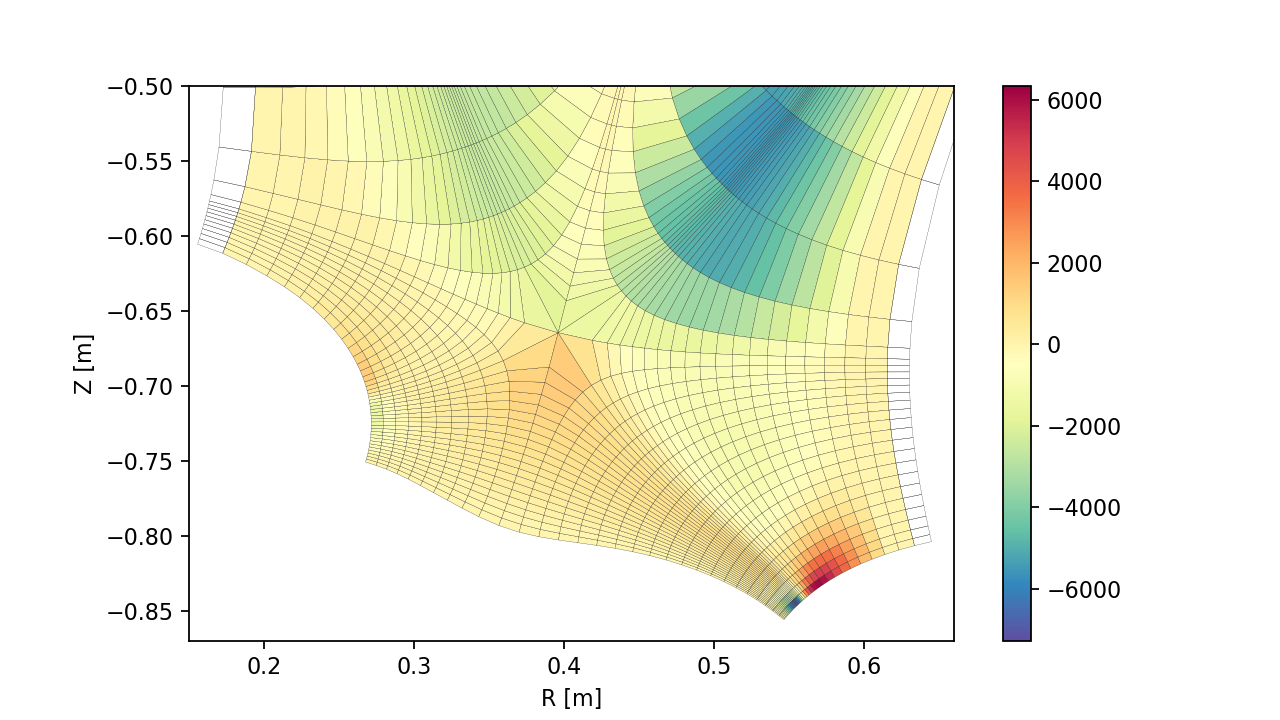

In [48]:
plt.close("all")
fig, ax = plt.subplots(figsize=(8,4.5), dpi = 160)

ds = casestore["puff_tn"].ds.copy()

ds = calculate_radial_fluxes(ds)
name = "d+"


# Dnnd_fix = ds["Dnnd"].copy()
# Dnnd_fix[{"x":1}] = Dnnd_fix[{"x":2}]
# Dnnd_fix[{"x":0}] = Dnnd_fix[{"x":2}]
# Dnnd_fix[{"x":-1}] = Dnnd_fix[{"x":-3}]
# Dnnd_fix[{"x":-2}] = Dnnd_fix[{"x":-3}]

# Nd_fix = ds["Nd"].copy()
# Nd_fix[{"x":1}] = Nd_fix[{"x":2}]
# Nd_fix[{"x":0}] = Nd_fix[{"x":2}]
# Nd_fix[{"x":-1}] = Nd_fix[{"x":-3}]
# Nd_fix[{"x":-2}] = Nd_fix[{"x":-3}]

Pd_fix = ds["Pd"].copy()
Pd_fix[{"x":1}] = Pd_fix[{"x":2}]
Pd_fix[{"x":0}] = Pd_fix[{"x":2}]
Pd_fix[{"x":-1}] = Pd_fix[{"x":-3}]
Pd_fix[{"x":-2}] = Pd_fix[{"x":-3}]


Td_fix = ds[f"Td"].copy()
Td_fix[{"x":1}] = Td_fix[{"x":2}]
Td_fix[{"x":0}] = Td_fix[{"x":2}]
Td_fix[{"x":-1}] = Td_fix[{"x":-3}]
Td_fix[{"x":-2}] = Td_fix[{"x":-3}]

m = ds.metadata
Pnorm = m["Nnorm"] * m["Tnorm"] * constants("q_e")
Plim = ds[f"Pd"].where(ds[f"Pd"]>0, 1e-8 * Pnorm) # Limit P to 1e-8 in normalised units
Plim_fix = Pd_fix.where(Pd_fix>0, 1e-8 * Pnorm)

# Diffusion
# _, fi1  =  Div_a_Grad_perp_upwind_fast(ds, ds[f"Nd+"] * ds[f"anomalous_Chi_d+"], constants("q_e") * ds[f"Td+"])
_, fn1  =  Div_a_Grad_perp_fast(ds, ds[f"Dnnd"]*ds[f"Pd"], np.log(Plim_fix))

def plot(x):
    x.isel(t=-1).bout.polygon(ax = ax, cmap = "Spectral_r", antialias = True, linewidth = 0.1, vmax = None, vmin  = None)
    
# Td_fix.isel(t=-1).bout.polygon(ax = ax, cmap = "Spectral_r", antialias = True, linewidth = 0.1, vmax = None, vmin  = None)

# plot(fn1)
# plot(ds["hf_perp_tot_R_d"])
plot(fn1)
# plot(ds["Td"])
# plot(Td_fix)
camera_view(ax, "lower2")

In [12]:
%matplotlib widget

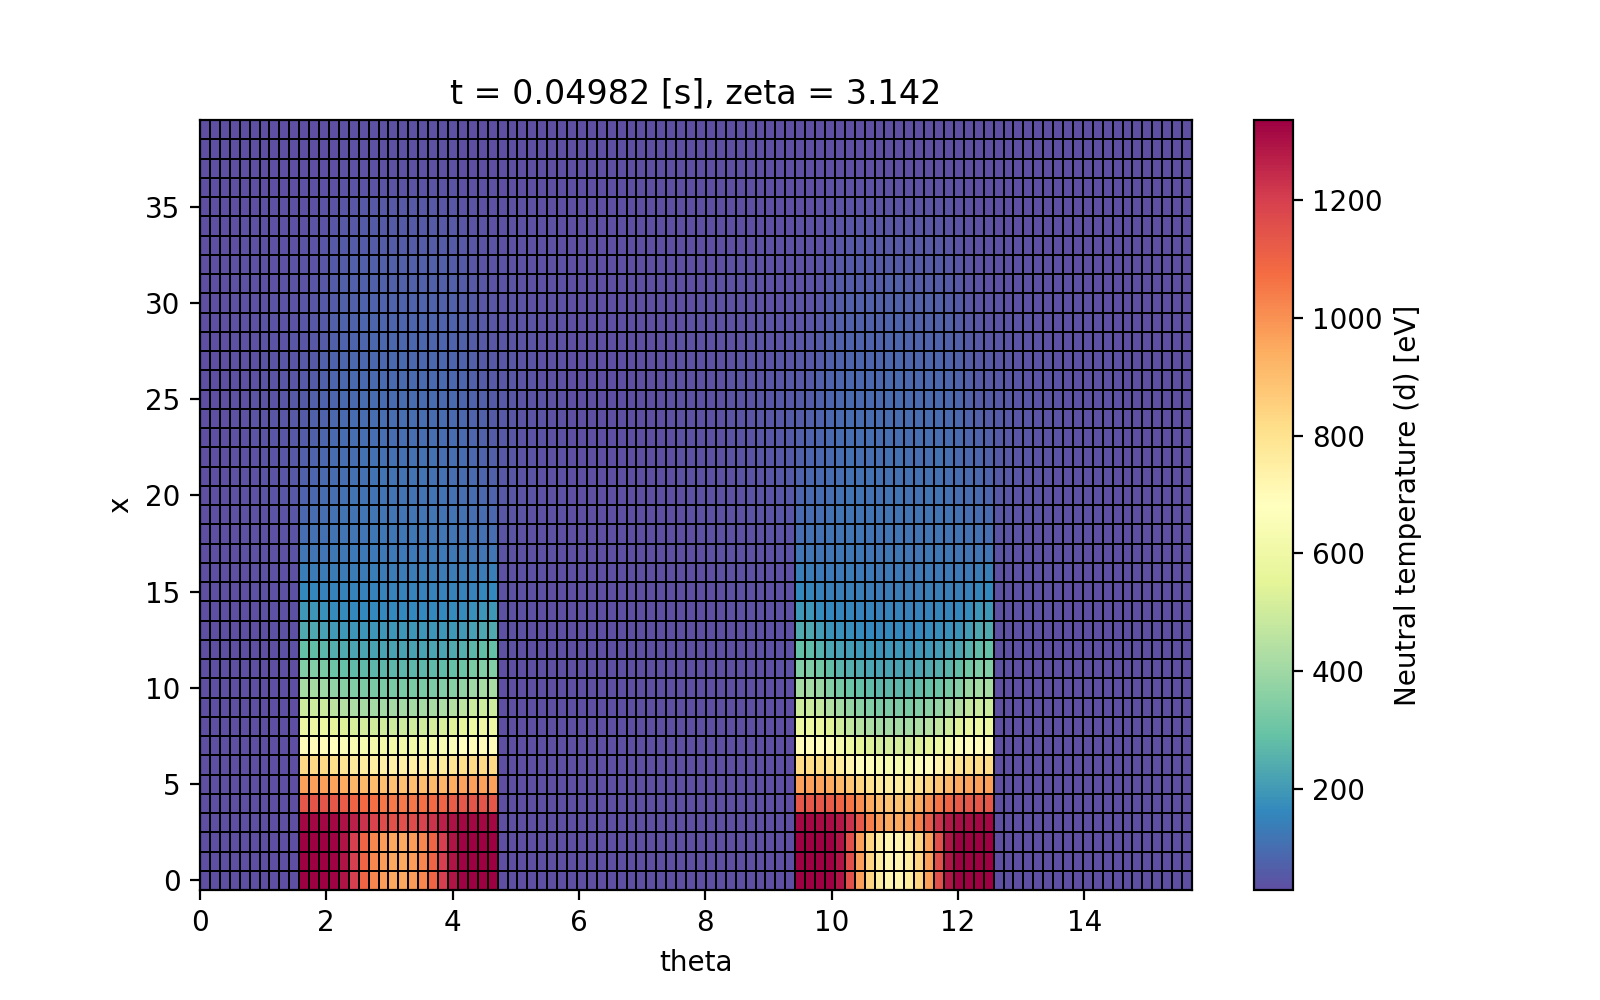

In [42]:
plt.close("all")
fig, ax = plt.subplots(figsize=(8,5), dpi = 200)
Td_fix.isel(t=5).plot(ax = ax, cmap = "Spectral_r", color = "k", linewidth = 0.01)

In [30]:
np.set_printoptions(threshold=sys.maxsize)
x = np.array(Td_fix.data)
np.argwhere(np.isnan(x))

array([], shape=(0, 3), dtype=int64)

In [89]:
Dnnd_fix[{"x":1}] = Dnnd_fix[{"x":2}]
Dnnd_fix[{"x":0}] = Dnnd_fix[{"x":2}]

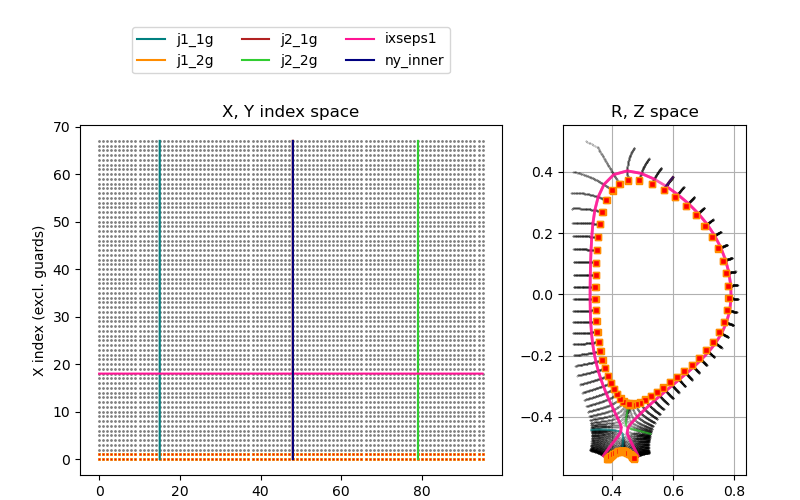

In [86]:
plt.close("all")
ds = casestore["compass"].ds
plot_selection(ds, ds[{"x":slice(0,2)}])

c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


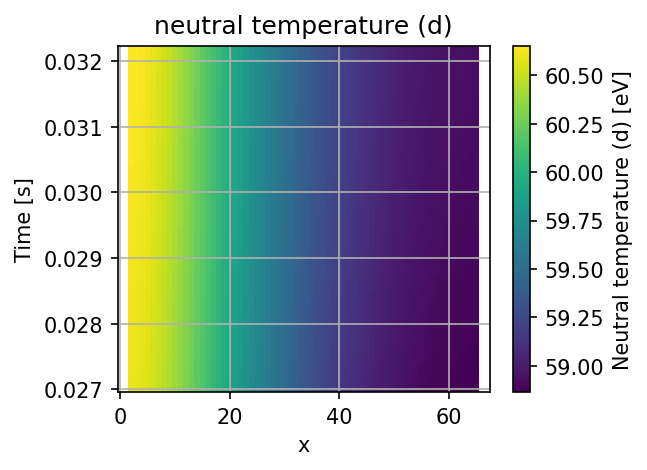

In [156]:
# plot_omp([ds["pf_perp_diff_L_d"]])
plot_omp([ds["Td"]])

In [148]:
ds = casestore["compass"].ds.copy()
ds["pf_perp_diff_L_d"].sum("theta")[-1].values.sum()

-1.2628544381360944e+22

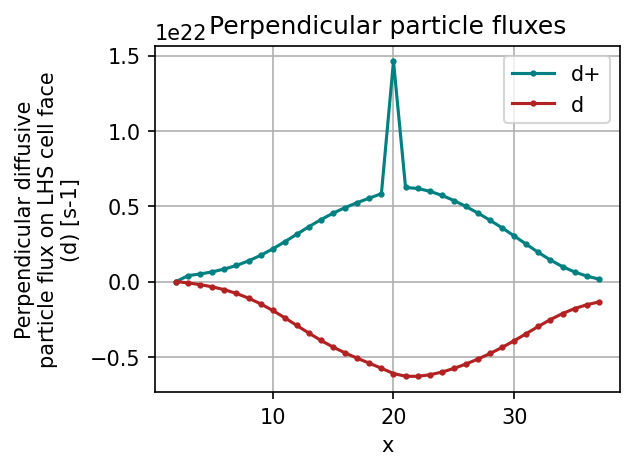

In [10]:
plot_perp_particle_fluxes(ds.isel(t=-1))

Old time: 4.85e-02
New time: 4.85e-02


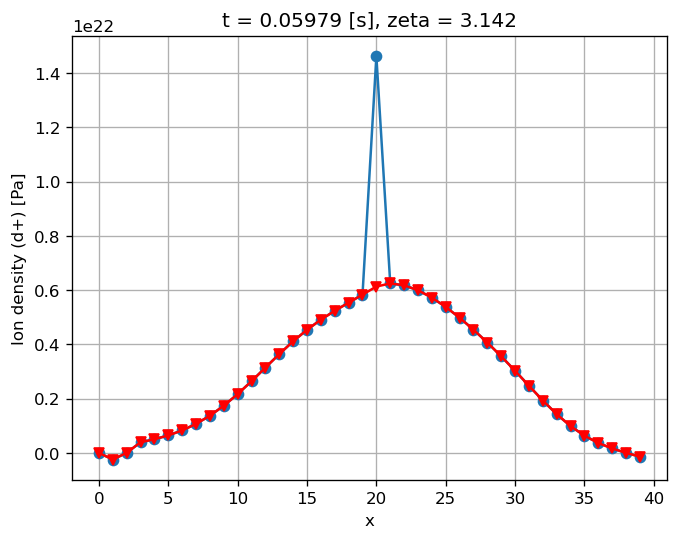

In [23]:
import time
time1 = time.time()


a = ds[f"anomalous_D_d+"]
f = ds[f"Nd+"] 

J = ds["J"] # Jacobian
g11 = ds["g11"]
dx = ds["dx"]
dy = ds["dy"]
dz = ds["dz"]

# From L784
#         // Use the upwind coefficient
#     const BoutReal fout = gradient * ((gradient > 0) ? a(i + 1, j, k) : a(i, j, k));

# shift(x=-1) returns array of x[i+1]s because it moves the array 1 step towards start
# So this is equivalent to (f[i+1] - f[i]) * (J[i]*g11[i] - J[i+1]*g11[i+1]) / (dx[i] + dx[i+1])

gradient = (f.shift(x=-1) - f) * (J*g11 + J.shift(x=-1)*g11.shift(x=-1)) / (dx + dx.shift(x=-1))
# Upwind scheme: if gradient positive, yield a[i+1]. If gradient negative, yield a[i]
# xr.where: where true, yield a, else yield something else
a_upwind = a.where(gradient<0, a.shift(x=-1))
flux = -gradient * a_upwind
flux *= dy * dz

F_R = flux
F_L = flux.shift(x=1)  # the shift of 1 index to get F_L because the left flux at cell X is the same as the right flux at cell X-1.

time2 = time.time()



L, R  =  Div_a_Grad_perp_upwind_fast(ds, ds[f"anomalous_D_d+"], ds[f"Nd+"])

time3 = time.time()

print(f"Old time: {time2-time1:.2e}")
print(f"New time: {time3-time2:.2e}")

fig, ax = plt.subplots(dpi = 120)
ax.grid()
L.sum("theta").isel(t=-1).plot(ax = ax,  marker = "o")
F_L.sum("theta").isel(t=-1).plot(ax = ax,  marker = "v", c = "r", label = "New")

In [170]:
ds = casestore["puff"].ds
merge_targets = True
show = True

print("---------------------------------------")
print("HEAT BALANCE")
print("---------------------------------------")


m = ds.metadata
core = ds.hermesm.select_region("core_edge")
sol = ds.hermesm.select_region("sol_edge")
pfr = ds.hermesm.select_region("pfr_edge")
domain = ds.hermesm.select_region("all_noguards")
domain_volume = domain["dv"].values.sum()

df = pd.DataFrame()
hf = dict()

# Radial and edge fluxes
# The summing is clunky but there's apparently no other way in Xarray!
net = dict()
list_places = ["src", "core", "sol", "pfr"]
for place in list_places:
    net[f"hf_int_{place}_net"] = 0

for species in m["species"]:
    hf[species] = dict()
    ds[f"hf_int_src_{species}"] = (domain[f"P{species}_src"] * domain["dv"]).sum(["x", "theta"]).squeeze() * 3/2
    ds[f"hf_int_core_{species}"] = core[f"hf_perp_tot_L_{species}"].sum("theta").squeeze()
    ds[f"hf_int_sol_{species}"] = sol[f"hf_perp_tot_R_{species}"].sum("theta").squeeze()
    ds[f"hf_int_pfr_{species}"] = pfr[f"hf_perp_tot_L_{species}"].sum("theta").squeeze()
    
    for place in list_places:
        net[f"hf_int_{place}_net"] += ds[f"hf_int_{place}_{species}"]
        
for place in list_places:
    ds[f"hf_int_{place}_net"] = net[f"hf_int_{place}_net"]


# Target fluxes
for target_name in m["targets"]:
    net[target_name] = 0
net["targets"] = 0

for species in m["ion_species"]+m["neutral_species"]:
    for target_name in m["targets"]:
        ds[f"hf_int_{target_name}_{species}"] = ds[f"hf_{target_name}_{species}"].sum("x").squeeze()
        net[target_name] += ds[f"hf_int_{target_name}_{species}"]
        
for target_name in m["targets"]:
    ds[f"hf_int_{target_name}_net"] = net[target_name]
    net["targets"] += net[target_name]
    
ds[f"hf_int_targets_net"] = net["targets"]
    
     
# Atomic reaction fluxes
ds[f"hf_int_rad_ex_e"] = (domain["Rd+_ex"] * domain["dv"]).sum(["x", "theta"]).squeeze()
ds[f"hf_int_rad_rec_e"] = (domain["Rd+_rec"] * domain["dv"]).sum(["x", "theta"]).squeeze()       
            
ds["hf_int_rad_ex_net"] = ds[f"hf_int_rad_ex_e"]
ds[f"hf_int_rad_rec_net"] = ds[f"hf_int_rad_rec_e"]

ds[f"hf_int_total_net"] = \
    ds["hf_int_src_net"] + ds["hf_int_core_net"] + ds["hf_int_sol_net"] + ds["hf_int_pfr_net"] \
        + ds["hf_int_targets_net"] + ds["hf_int_rad_ex_net"] + ds["hf_int_rad_rec_net"]
        


---------------------------------------
HEAT BALANCE
---------------------------------------


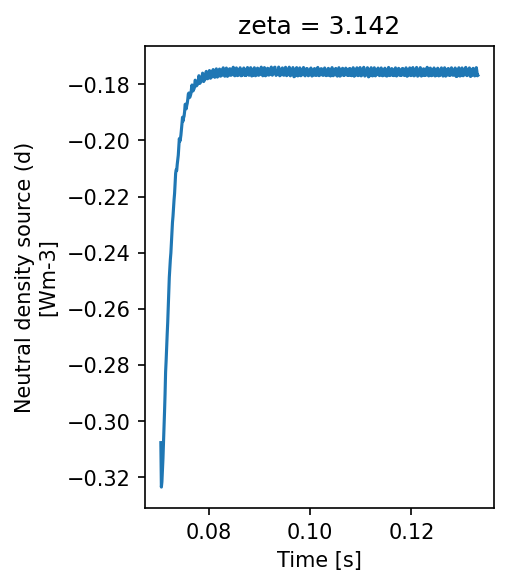

In [294]:
ds = casestore["testbase"].ds
m = ds.metadata
    
core = ds.hermesm.select_region("core_edge")
sol = ds.hermesm.select_region("sol_edge")
pfr = ds.hermesm.select_region("pfr_edge")
domain = ds.hermesm.select_region("all_noguards").squeeze()
domain_volume = domain["dv"].values.sum()

df = pd.DataFrame()
pf = dict()

# Radial and edge fluxes
# The summing is clunky but there's apparently no other way in Xarray!
net = dict()
list_places = ["src", "core", "sol", "pfr"]
for place in list_places:
    net[f"pf_int_{place}_net"] = 0

for species in m["ion_species"] + m["neutral_species"]:
    hf[species] = dict()
    ds[f"pf_int_src_{species}"] = (domain[f"S{species}_src"] * domain["dv"]).sum(["x", "theta"]).squeeze() * 3/2
    ds[f"pf_int_core_{species}"] = core[f"pf_perp_diff_L_{species}"].sum("theta").squeeze()
    ds[f"pf_int_sol_{species}"] = sol[f"pf_perp_diff_R_{species}"].sum("theta").squeeze()
    ds[f"pf_int_pfr_{species}"] = pfr[f"pf_perp_diff_L_{species}"].sum("theta").squeeze()
    
    for place in list_places:
        net[f"pf_int_{place}_net"] += ds[f"pf_int_{place}_{species}"]
        
for place in list_places:
    ds[f"pf_int_{place}_net"] = net[f"pf_int_{place}_net"]
    
    
# Target fluxes
for target_name in m["targets"]:
    net[target_name] = 0
net["targets"] = 0

for species in m["ion_species"]+m["neutral_species"]:
    for target_name in m["targets"]:
        ds[f"pf_int_{target_name}_{species}"] = ds[f"pf_{target_name}_{species}"].sum("x").squeeze()
        net[target_name] += ds[f"pf_int_{target_name}_{species}"]
        
for target_name in m["targets"]:
    ds[f"pf_int_{target_name}_net"] = net[target_name]
    net["targets"] += net[target_name]
    
ds[f"pf_int_targets_net"] = net["targets"]


# Atomic reaction fluxes
for ion in m["ion_species"]:
    neutral = ion.split("+")[0]
    ds[f"pf_int_iz_{ion}"] = (domain[f"S{ion}_iz"] * domain["dv"]).sum(["x", "theta"]).squeeze()
    ds[f"pf_int_iz_{neutral}"] = ds[f"pf_int_iz_{ion}"] * -1
    
    ds[f"pf_int_rec_{ion}"] = (domain[f"S{ion}_rec"] * domain["dv"]).sum(["x", "theta"]).squeeze()
    ds[f"pf_int_rec_{neutral}"] = ds[f"pf_int_rec_{ion}"] * -1

ds[f"pf_int_total_net"] = \
    ds["pf_int_src_net"] + ds["pf_int_core_net"] + ds["pf_int_sol_net"] + ds["pf_int_pfr_net"] \
        + ds["pf_int_targets_net"]
        
        
fig, ax = plt.subplots(figsize=(3,4), dpi = 150)
(ds["pf_int_total_net"] / (ds["pf_int_core_net"] + ds["pf_int_src_net"])).plot(ax = ax)
# (ds["pf_int_total_net"]).plot(ax = ax)

In [295]:
print("---------------------------------------")
print("PARTICLE BALANCE")
print("---------------------------------------")

df = pd.DataFrame()
m = ds.metadata

if f"pf_int_{m['targets'][0]}" in ds.data_vars:
    merge_targets = False
else:
    merge_targets = True

last = ds.isel(t=-1)
for species in m["species"]:
    df.loc["source", species] = last[f"pf_int_src_{species}"]
    df.loc["core", species] = last[f"pf_int_core_{species}"]
    df.loc["sol", species] = last[f"pf_int_sol_{species}"]
    df.loc["pfr", species] = last[f"pf_int_pfr_{species}"]
    if merge_targets is True:
        df.loc["targets", species] = last[f"pf_int_targets_{species}"]
    else:
        for target in m["targets"]:
            df.loc[target, species] = last[f"pf_int_{target}_{species}"]
    
for species in m["ion_species"] + m["neutral_species"]:
    df.loc["iz", species] = last[f"pf_int_iz_{species}"]
    df.loc["rec", species] = last[f"pf_int_rec_{species}"]
    
df["total"] = df.sum(axis=1)
imbalance = df["total"].sum()
imbalance_frac = imbalance / (df["total"]["source"] + df["total"]["core"])

# print(f"Recycling fraction: {frec:.2%}")
print(f"Domain volume: {ds['dv'].sum():.3e} [m3]")
print(f"Particle imbalance: {imbalance:,.3f} [s-1]")
print(f"Particle imbalance as frac of core + source: {imbalance_frac:.2%}")
print("---------------------------------------")
print(f"Total fluxes in [s-1]:")
table = df.copy() # For display only

def styler(s):
    if abs(s) < 0.01 or pd.isna(s):
        c =  "color: lightgrey"
    else:
        c =  "color: black"

    return c
    
ts = table.style.format("{:.2f}")
ts = ts.applymap(styler)
display(ts)

---------------------------------------
PARTICLE BALANCE
---------------------------------------


KeyError: 'pf_int_targets_d'

In [297]:
[print(x) for x in ds.data_vars if "pf_int" in x]

pf_int_src_d+
pf_int_core_d+
pf_int_sol_d+
pf_int_pfr_d+
pf_int_src_d
pf_int_core_d
pf_int_sol_d
pf_int_pfr_d
pf_int_src_net
pf_int_core_net
pf_int_sol_net
pf_int_pfr_net
pf_int_inner_lower_d+
pf_int_outer_lower_d+
pf_int_inner_upper_d+
pf_int_outer_upper_d+
pf_int_inner_lower_d
pf_int_outer_lower_d
pf_int_inner_upper_d
pf_int_outer_upper_d
pf_int_inner_lower_net
pf_int_outer_lower_net
pf_int_inner_upper_net
pf_int_outer_upper_net
pf_int_targets_net
pf_int_iz_d+
pf_int_iz_d
pf_int_rec_d+
pf_int_rec_d
pf_int_total_net


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
m = ds.metadata
    
core = ds.hermesm.select_region("core_edge")
sol = ds.hermesm.select_region("sol_edge")
pfr = ds.hermesm.select_region("pfr_edge")
domain = ds.hermesm.select_region("all_noguards").squeeze()
domain_volume = domain["dv"].values.sum()

heavy_species = m["ion_species"] + m["neutral_species"]

df = pd.DataFrame()

# for species in heavy_species:
#     df.loc["core", species] = 

pf = dict()
hf = dict()

# pf_total = dict()

for species in heavy_species:
    pf[species] = dict()
    # Radial fluxes
    pf[species]["source"] = (domain[f"S{species}_src"] * domain["dv"]).sum(["x", "theta"]).squeeze()
    pf[species]["core"] = core[f"pf_perp_diff_L_{species}"].sum("theta").squeeze()
    pf[species]["sol"] = sol[f"pf_perp_diff_R_{species}"].sum("theta").squeeze()
    pf[species]["pfr"] = pfr[f"pf_perp_diff_L_{species}"].sum("theta").squeeze()

    # Target fluxes
    if merge_targets is True:
        pf[species]["targets"] = 0
        for target_name in m["targets"]:
            pf[species]["targets"] += ds[f"pf_{target_name}_{species}"].sum("x").squeeze()
    else:
        for target_name in m["targets"]:
            pf[species][target_name] = ds[f"pf_{target_name}_{species}"].sum("x").squeeze()

for species in m["ion_species"]:      
    # Atomic reaction fluxes
    pf[species]["iz"] = (domain["Sd+_iz"] * domain["dv"]).sum(["x", "theta"]).squeeze()
    pf[species]["rec"] = (domain["Sd+_rec"] * domain["dv"]).sum(["x", "theta"]).squeeze()
    
    neutral = species.replace("+","")
    
    # Neutral partner has opposite fluxes
    pf[neutral]["iz"] = pf[species]["iz"] * -1
    pf[neutral]["rec"] = pf[species]["rec"] * -1
    
pf_last = dict()

df = pd.DataFrame()
for species in pf.keys():
    pf_last[species] = dict()
    for loc in pf[species].keys():
        pf_last[species][loc] = pf[species][loc].values[-1]
        
df = pd.DataFrame.from_dict(pf_last)
df["total"] = df["d+"] + df["d"] 

totals = pd.DataFrame(columns = df.columns)
totals.loc["total"] = df.sum(axis=0)
totals.loc["total(frac)"] = totals.loc["total"] / df.loc[["source", "core"], :].sum(axis=0)

if merge_targets is True:
    target_total = pf[species]["targets"].isel(t=-1)
else:
    target_total = np.sum([pf_last["d+"][x] for x in m["targets"]])

frec = 1 - (pf_last["d+"]["core"] + pf_last["d+"]["source"]) / abs(target_total)

if show is True:
    table = pd.concat([df,totals])
    
    def styler(s):
        if abs(s) < 0.01 or pd.isna(s):
            c =  "color: lightgrey"
        else:
            c =  "color: black"

        return c

    print(f"Recycling fraction: {frec:.2%}")
    print(f"Domain volume: {domain['dv'].sum():.3e}")
    
    ts = table.style.format("{:.3e}")
    ts = ts.applymap(styler)
    display(ts)

else:
    return pf

In [181]:
def plot_omp(da_list):
    fig, ax = plt.subplots(figsize=(4,3), dpi = 150)
    for da in da_list:
        da.hermesm.select_region("outer_midplane_a").plot(ax = ax, label = da.standard_name)
        
    ax.grid()
    ax.legend()
    if len(da_list) == 1:
        ax.set_title(da_list[0].standard_name)
    
plot_omp([ds["Td+"]])

---------------------------------------
HEAT BALANCE
---------------------------------------


c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


KeyError: 'total'

In [189]:
print("---------------------------------------")
print("HEAT BALANCE")
print("---------------------------------------")

df = pd.DataFrame()
m = ds.metadata

if f"hf_int_{m['targets'][0]}" in ds.data_vars:
    merge_targets = False
else:
    merge_targets = True

last = ds.isel(t=-1)
for species in m["species"]:
    df.loc["source", species] = last[f"hf_int_src_{species}"]
    df.loc["core", species] = last[f"hf_int_core_{species}"]
    df.loc["sol", species] = last[f"hf_int_sol_{species}"]
    df.loc["pfr", species] = last[f"hf_int_pfr_{species}"]
    if merge_targets is True:
        df.loc["targets", species] = last[f"hf_int_targets_{species}"]
    else:
        for target in m["targets"]:
            df.loc[target, species] = last[f"hf_int_{target}_{species}"]
    
    df.loc["rad_ex", "e"] = last[f"hf_int_rad_ex_e"]
    df.loc["rad_rec", "e"] = last[f"hf_int_rad_rec_e"]
    
df["total"] = df.sum(axis=1)
imbalance = df["total"].sum()
imbalance_frac = imbalance / (df["total"]["source"] + df["total"]["core"])

# print(f"Recycling fraction: {frec:.2%}")
print(f"Domain volume: {domain['dv'].sum():.3e} [m3]")
print(f"Power imbalance: {imbalance*1e6:,.0f} [W]")
print(f"Power imbalance as frac of core + source: {imbalance_frac:.2%}")
print("---------------------------------------")
print(f"Total fluxes in [MW]:")
table = df.copy()*1e-6 # For display only

def styler(s):
    if abs(s) < 0.01 or pd.isna(s):
        c =  "color: lightgrey"
    else:
        c =  "color: black"

    return c
    
ts = table.style.format("{:.2f}")
ts = ts.applymap(styler)
display(ts)

---------------------------------------
HEAT BALANCE
---------------------------------------


c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


Domain volume: 1.556e+00 [m3]
Power imbalance: -1,010,050,803 [W]
Power imbalance as frac of core + source: -0.62%
---------------------------------------
Total fluxes in [MW]:


In [186]:
df.sum(axis=1)

source     0.000000e+00
core       1.627126e+05
sol       -5.285332e-14
pfr        0.000000e+00
targets   -1.461251e+05
rad_ex    -1.759672e+04
rad_rec   -8.291187e-01
dtype: float64

<Axes: >

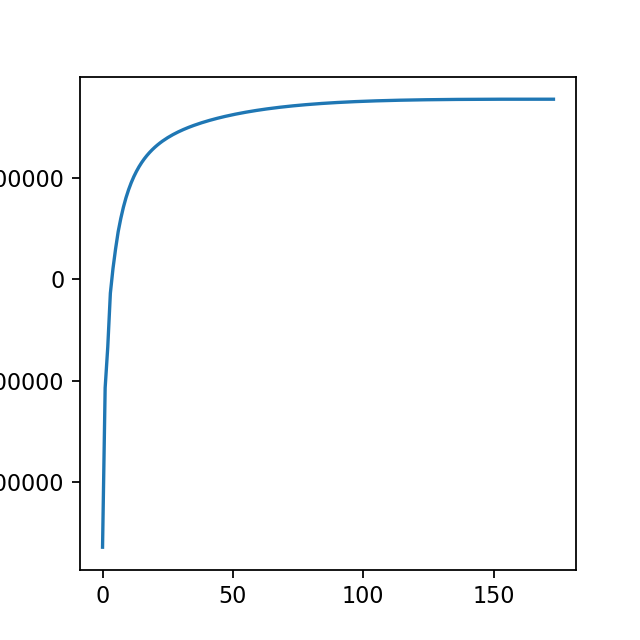

In [ ]:

        



# Assemble final timesteps
hf_last = dict()

df = pd.DataFrame()
for species in hf.keys():
    hf_last[species] = dict()
    for loc in hf[species].keys():
        hf_last[species][loc] = hf[species][loc].values[-1] * 1e-6    # EVERYTHING IN MW
        
df = pd.DataFrame.from_dict(hf_last)
df["total"] = df.sum(axis=1)

totals = pd.DataFrame(columns = df.columns)
totals.loc["total"] = df.sum(axis=0)


totals.loc["total(frac)"] = totals.loc["total"] / df.loc[["source", "core"], :].sum(axis=0)

if merge_targets is True:
    target_total = hf_last["d+"]["targets"] + hf_last["e"]["targets"]
else:
    target_total = np.sum([hf_last["d+"][x]+hf_last["e"][x] for x in m["targets"]])

imbalance = df["total"].sum()
imbalance_frac = imbalance / (df["total"]["source"] + df["total"]["core"])

if show is True:
    # print(f"Recycling fraction: {frec:.2%}")
    print(f"Domain volume: {domain['dv'].sum():.3e} [m3]")
    print(f"Power imbalance: {imbalance*1e6:,.0f} [W]")
    print(f"Power imbalance as frac of core + source: {imbalance_frac:.2%}")
    table = pd.concat([df,totals])
    
    def styler(s):
        if abs(s) < 0.01 or pd.isna(s):
            c =  "color: lightgrey"
        else:
            c =  "color: black"

        
        return c
        
    ts = table.style.format("{:.2f}")
    ts = ts.applymap(styler)
    display(ts)

In [93]:
(ds["Pd+_src"].isel(t=-1)*ds["dv"]).sum().values

array(999999.99126189)

In [104]:
styler(5)

['color: black', 'format: {":.3f"}']

In [108]:
def styler(s):
    if abs(s) < 0.01 or pd.isna(s):
        c =  "color: lightgrey"
    else:
        c =  "color: black"

    
    return c
    
ts = table.style.format("{:.2f}")
ts = ts.applymap(styler)
display(ts)

In [98]:
abs(5)

5

In [ ]:
def make_pretty(styler):
    styler.set_caption("Weather Conditions")
    styler.format(rain_condition)
    styler.format_index(lambda v: v.strftime("%A"))
    styler.background_gradient(axis=None, vmin=1, vmax=5, cmap="YlGnBu")
    return styler

In [109]:
calculate_particle_balance(ds)

---------------------------------------
PARTICLE BALANCE
---------------------------------------
Recycling fraction: 0.92%
Domain volume: 1.556e+00


In [59]:
%matplotlib widget

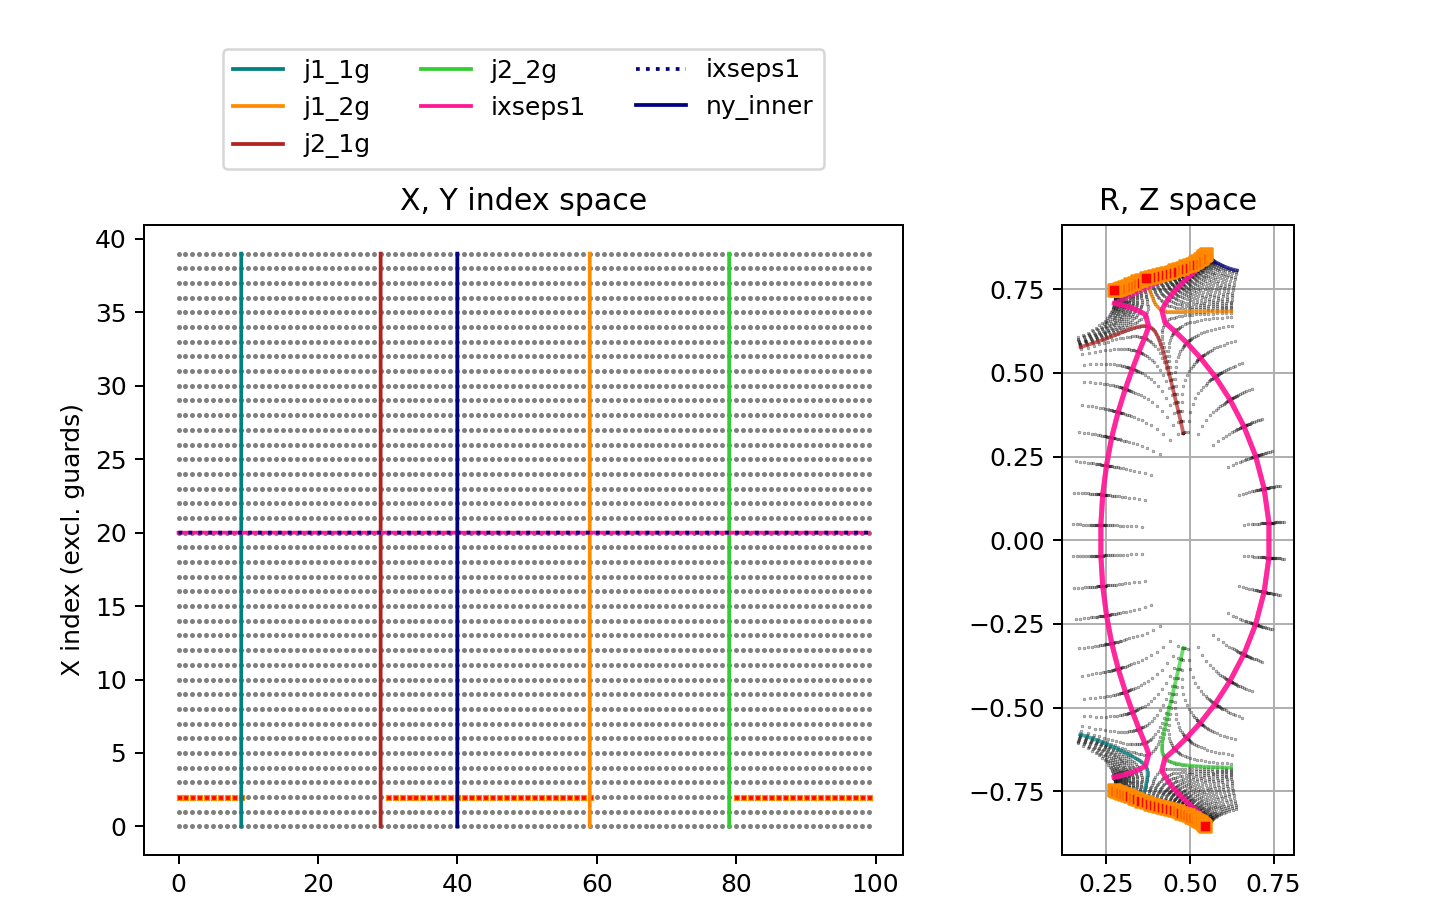

In [73]:
# case = "compass"
case = "src"
plot_selection(casestore[case].ds, casestore[case].ds.hermesm.select_region("pfr_edge"), dpi = 180)

In [50]:

total_target = 0

for name in ds.metadata["targets"]:
    total_target += ds[f"pf_{name}_d+"].sum("x").isel(t=-1).values
    
total_target

c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))
c:\Users\mikek\anaconda3\envs\new\lib\site-packages\dask\core.py:119: RuntimeWarning: invalid value encountered in sqrt
  return func(*(_execute_task(a, cache) for a in args))


-1.5657056877253942e+20

In [ ]:
"""
Power in through X inner Pin = 162418.93698190025 W  [55238.53718922597 ion 107180.39979267426 electron]
Power out through X outer Pout,x 0.0 W [0.0 ion 0.0 electron]
Power out through lower sheath: Pout,d = 41805.580325914736 W [25543.116778984073 ion 16262.463546930667 electron]
Power out through upper sheath: Pout,u = 85927.55896679485 W [40862.03993701901 ion 45065.51902977584 electron]
Domain volume: 0.44588748805918543 m^3
Thermal energy content: 49.51050515563746 J
Energy confinement time: 0.00030483209701806415 s
Net power radiation: Prad = 26396.319077657958 W [26395.075399576534 excitation 1.2436780814237998 recombination]
Net input power Pnet = Pin - Pout,x - Pout,d - Pout,u - Prad = 8289.4786115327 W
------------
Particle flux in through X inner: 4.149953576517765e+19 /s
Particle flux out through X outer: 0.0 /s
Particle flux to lower sheath: 2.0381675806634667e+21 /s
Particle flux to upper sheath: 2.2985141232757716e+21 /s
Recycling fraction: 0.990430578354994
Total ionization rate: 4.290451033846074e+21 /s
Total recombination rate: -2.5038401874305984e+17 /s
Particle content: 2.169621801152505e+18
Particle throughput time: 0.05228062823230518 s
------------
"""

In [8]:
df

Empty DataFrame
Columns: []
Index: []

In [30]:
pf_last = dict()

df = pd.DataFrame()
for species in pf.keys():
    pf_last[species] = dict()
    for loc in pf[species].keys():
        pf_last[species][loc] = pf[species][loc].values[-1]
        
df = pd.DataFrame.from_dict(pf_last)
df["total"] = df["d+"] + df["d"] 

totals = pd.DataFrame(columns = df.columns)
totals.loc["total"] = df.sum(axis=0)
totals.loc["total(frac)"] = totals.loc["total"] / df.loc[["source", "core"], :].sum(axis=0)

target_total = np.sum([pf_last["d+"][x] for x in m["targets"]])

frec = (pf_last["d+"]["core"] + pf_last["d+"]["source"]) / target_total

print(f"Recycling fraction: {frec:.2%}")
print(f"Domain volume: {domain['dv'].sum():.3e}")
display(pd.concat([df,totals]))

Recycling fraction: -0.008743283612312512
Domain volume: 1.556e+00


d+             d         total
source       3.000000e+20  1.200000e+21  1.500000e+21
core         0.000000e+00  0.000000e+00  0.000000e+00
sol          0.000000e+00  0.000000e+00  0.000000e+00
pfr          0.000000e+00  0.000000e+00  0.000000e+00
inner_lower -2.716380e+21  2.580561e+21 -1.358190e+20
outer_lower -1.302729e+22  1.237592e+22 -6.513644e+20
inner_upper -2.726862e+21  2.590519e+21 -1.363431e+20
outer_upper -1.584152e+22  1.504944e+22 -7.920760e+20
iz           3.039843e+22 -3.039843e+22  0.000000e+00
rec         -1.238270e+18  1.238270e+18  0.000000e+00
total       -3.614858e+21  3.399256e+21 -2.156026e+20
total(frac) -1.204953e+01  2.832713e+00 -1.437351e-01

In [29]:
pf_last["d+"]["core"]

0.0

In [28]:
target_total

-3.4312051776237993e+22

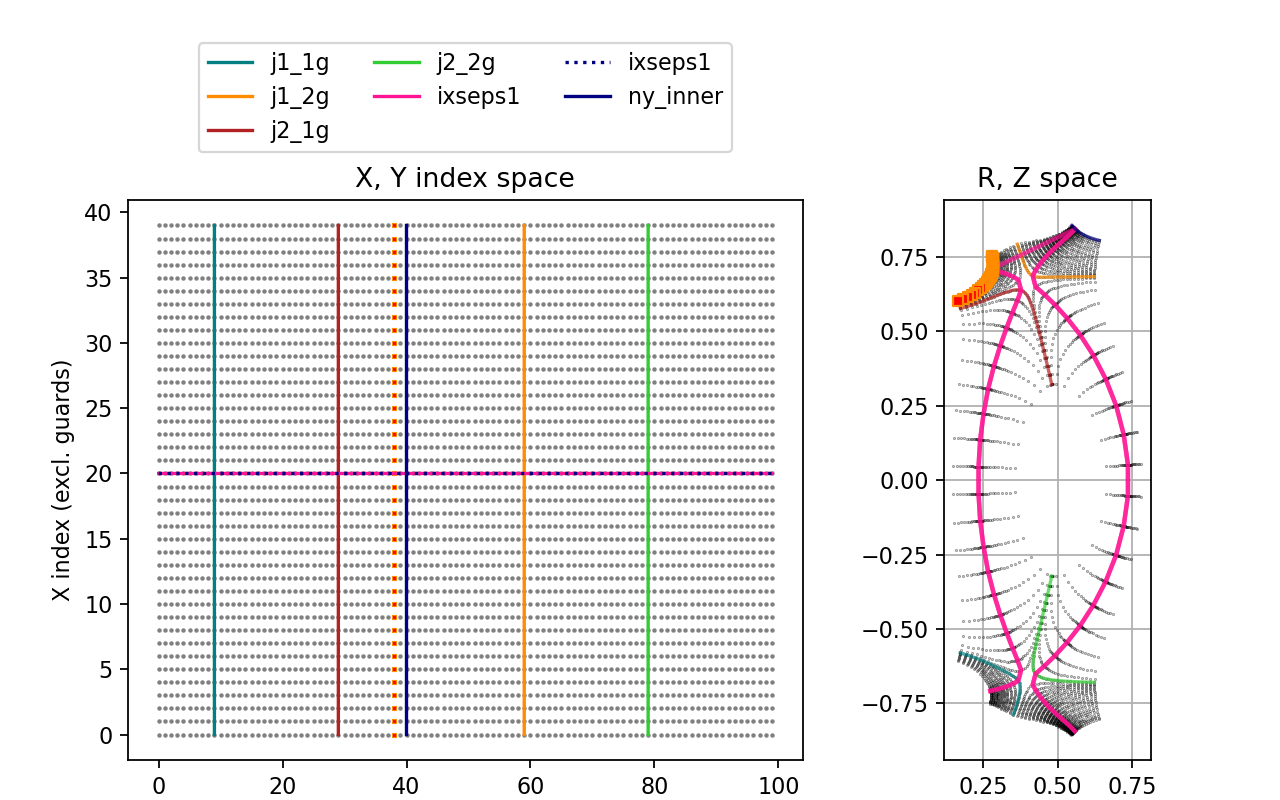

In [19]:
plt.close("all")
# fig, ax = plt.subplots(figsize=(6,6), dpi = 150)
sel = (slice(None, None), m["ny_inner"]-2)
ds_sel = ds.isel(x = sel[0], theta = sel[1])

plot_selection(ds, ds_sel, dpi = 160)

In [518]:
(ds["Sd+_src"] * ds["dv"]).isel(t=-1).sum().values

array(3.13190543e-05)

In [ ]:
from hermes3.utils import *

# case.ds = case.ds.isel(t=-1)
ds = case.ds.isel(t=-1).copy()
ds = calculate_radial_fluxes(ds)
ds = calculate_target_fluxes(ds)

core = ds.hermesm.select_region("core_edge").squeeze()
sol = ds.hermesm.select_region("sol_edge").squeeze()
domain = ds.hermesm.select_region("all_noguards").squeeze()


domain_volume = domain["dv"].values.sum()


# Radial heat flux
#---------------------------------------------
tot_hf_core_e = core["hf_perp_tot_L_e"].sum("theta").values
tot_hf_core_i = core["hf_perp_tot_L_d+"].sum("theta").values
hf_core = tot_hf_core_e + tot_hf_core_i

tot_hf_sol_e = sol["hf_perp_tot_R_e"].sum("theta").values
tot_hf_sol_i = sol["hf_perp_tot_R_d+"].sum("theta").values
hf_sol = tot_hf_sol_e + tot_hf_sol_i


# Radial particle flux
#---------------------------------------------
tot_pf_core_i = core["pf_perp_diff_L_d+"].sum("theta").values
pf_core = tot_pf_core_i

tot_pf_sol_i = sol["pf_perp_diff_R_d+"].sum("theta").values
pf_sol = tot_pf_sol_i


# Sheath fluxes
#---------------------------------------------
hf_targets_i = np.sum([ds[f"hf_{x}_d+"].values.sum() for x in ds.metadata["targets"]])
hf_targets_e = np.sum([ds[f"hf_{x}_e"].values.sum() for x in ds.metadata["targets"]])
pf_targets_i = np.sum([ds[f"pf_{x}_d+"].values.sum() for x in ds.metadata["targets"]])

sel = slice(ds.metadata["MXG"], -ds.metadata["MXG"])
hf_inner_lower_i = ds["hf_inner_lower_d+"][sel].values.sum()
hf_outer_lower_i = ds["hf_outer_lower_d+"][sel].values.sum()
hf_inner_lower_e = ds["hf_inner_lower_e"][sel].values.sum()
hf_outer_lower_e = ds["hf_outer_lower_e"][sel].values.sum()
pf_inner_lower_i = ds["pf_inner_lower_d+"][sel].values.sum()
pf_outer_lower_i = ds["pf_outer_lower_d+"][sel].values.sum()

hf_inner_lower = hf_inner_lower_i + hf_inner_lower_e
hf_outer_lower = hf_outer_lower_i + hf_outer_lower_e

pf_inner_lower = pf_inner_lower_i
pf_outer_lower = pf_outer_lower_i

# Integrals: 1.5x on radiation is wrong
#---------------------------------------------
pf_iz = (domain["Sd+_iz"] * domain["dv"]).sum(["x", "theta"]).values 
pf_rec = (domain["Sd+_rec"] * domain["dv"]).sum(["x", "theta"]).values 
hf_Rex = (domain["Rd+_ex"] * domain["dv"]).sum(["x", "theta"]).values
hf_Rrec = (domain["Rd+_rec"] * domain["dv"]).sum(["x", "theta"]).values 
hf_R = hf_Rex + hf_Rrec

# Totals
#---------------------------------------------
hf_net = hf_core + hf_sol + hf_inner_lower + hf_outer_lower + hf_R
pf_net = pf_core + pf_sol + pf_inner_lower + pf_outer_lower + pf_iz + pf_rec
hf_error = hf_net / hf_core
pf_error = pf_net / pf_core
frecycle = 1 - (pf_core + pf_sol) / abs(pf_inner_lower + pf_outer_lower)

# Prints
#---------------------------------------------

print(f"Power through X inner Pin = {hf_core:.5e} W  [{tot_hf_core_i:.5e} ion {tot_hf_core_e:.5e} electron]")
print(f"Power through X outer Pout = {hf_sol:.5e} W  [{tot_hf_sol_i:.5e} ion {tot_hf_sol_e:.5e} electron]")

print(f"Power out through lower (inner) sheath: {hf_inner_lower_i + hf_inner_lower_e:.3e} [{hf_inner_lower_i:.3e} ion {hf_inner_lower_e:.3e} electron]")
print(f"Power out through upper (outer) sheath: {hf_outer_lower_i + hf_outer_lower_e:.3e} [{hf_outer_lower_i:.3e} ion {hf_outer_lower_e:.3e} electron]")

print(f"Domain volume = {domain_volume:.3e} [m3]")

print(f"Power flux from radiation {hf_R:.3e} [W] [{hf_Rex:.3e} excitation  {hf_Rrec:.3e} recombination]")
print(f"Net input power hf_core + hf_sol + hf_inner_lower + hf_outer_lower + hf_R = {hf_net:.3e} [W]")
print(f"---> Heat flux error: {hf_error:.2%}")
print("------------")
print(f"Plasma particle flux through X inner: {pf_core:.3e}")
print(f"Plasma particle flux through X outer: {pf_sol:.3e}")

print(f"Plasma particle flux to lower (inner) sheath: {pf_inner_lower_i:.3e}")
print(f"Plasma particle flux to upper (outer) sheath: {pf_outer_lower_i:.3e}")

print(f"Plasma particle flux from ionisation: {pf_iz:.3e}")
print(f"Plasma particle flux from recombination: {pf_rec:.3e}")
print(f"---> Mass flux error: {pf_error:.2%}")
print(f"---> Recycling frac.: {frecycle:.2%}")
# plot_selection(case, sol)

Power through X inner Pin = 1.62437e+05 W  [5.52446e+04 ion 1.07192e+05 electron]
Power through X outer Pout = -5.28533e-14 W  [-5.28533e-14 ion 0.00000e+00 electron]
Power out through lower (inner) sheath: -5.948e+04 [-2.554e+04 ion -3.394e+04 electron]
Power out through upper (outer) sheath: -8.593e+04 [-4.086e+04 ion -4.507e+04 electron]
Domain volume = 4.459e-01 [m3]
Power flux from radiation -1.760e+04 [W] [-1.760e+04 excitation  -8.291e-01 recombination]
Net input power hf_core + hf_sol + hf_inner_lower + hf_outer_lower + hf_R = -5.726e+02 [W]
---> Heat flux error: -0.35%
------------
Plasma particle flux through X inner: 4.150e+19
Plasma particle flux through X outer: 0.000e+00
Plasma particle flux to lower (inner) sheath: -2.038e+21
Plasma particle flux to upper (outer) sheath: -2.299e+21
Plasma particle flux from ionisation: 4.290e+21
Plasma particle flux from recombination: -2.504e+17
---> Mass flux error: -12.00%
---> Recycling frac.: 99.04%


In [487]:
species = "d+"
(core[f"pf_perp_diff_L_{species}"]/  core["dv"]).sum("theta").isel(t=-1).values

array([1.30978388e+28])

In [474]:
(pf["d+"]["core"] / (pf["d+"]["inner_lower"] + pf["d+"]["outer_lower"]))[-1].values

array(-0.00951462)

In [503]:
mesh = Mesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3a5f3-coresrc.nc")

In [512]:
d = mesh.mesh

volume = (d["dx"] * d["dy"]  * d["J"] * 2*np.pi).squeeze()

(mesh.mesh["Nd+_src"].squeeze() * volume).sum()

BoutArray(3.e+20)

In [32]:
(ds["Pd+_src"] * ds["dv"]).isel(t=-1).sum().values

array(999999.99126189)

In [510]:
print()

(40, 108)

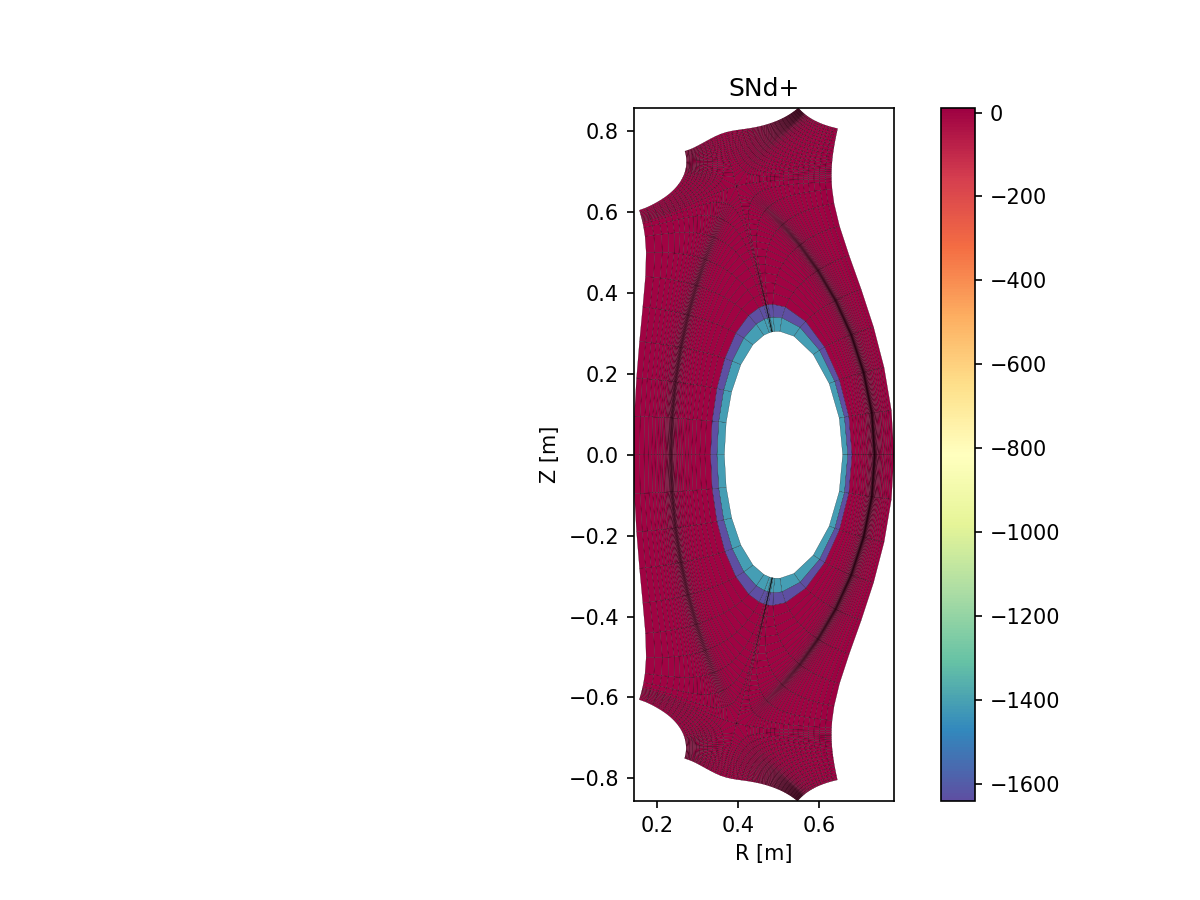

In [428]:
fig, ax = plt.subplots(figsize=(8,6), dpi = 150)

# data = ds["Td"].hermesm.clean_guards()
# data = ds["pf_perp_diff_L_d+"]
data = ds["SNd+"]*-1
# data = ds["Dnnd"]

data.isel(t=-1).bout.polygon(ax = ax, cmap = "Spectral_r", antialias = True, linewidth = 0.1, logscale = False, vmax = None, vmin = None)

# camera_view(ax, "lower_outer")

In [386]:
df["total"] = df["d+"] + df["d"]
display(df)


d+             d         total
core         4.060907e+25  0.000000e+00  4.060907e+25
sol          0.000000e+00  0.000000e+00  0.000000e+00
pfr          1.985223e+25 -1.217106e+26 -1.018584e+26
inner_lower -1.122041e+19  1.065939e+19 -5.610204e+17
outer_lower -5.116689e+19  4.860855e+19 -2.558345e+18
inner_upper -1.085645e+20  1.031363e+20 -5.428224e+18
outer_upper -5.572388e+19  5.293769e+19 -2.786194e+18
iz           3.369892e+22 -3.369892e+22  0.000000e+00
rec         -1.962887e+18  1.962887e+18  0.000000e+00

d+    d     total
0  1.489686 -inf -1.508267

In [377]:
ds.metadata["targets"]

['inner_lower', 'outer_lower']

In [221]:
df.loc["d+", "core"] = 5

df

core
d+   5.0

In [210]:
pd.DataFrame.from_dict(pf["d+"])

ValueError: Data must be 1-dimensional

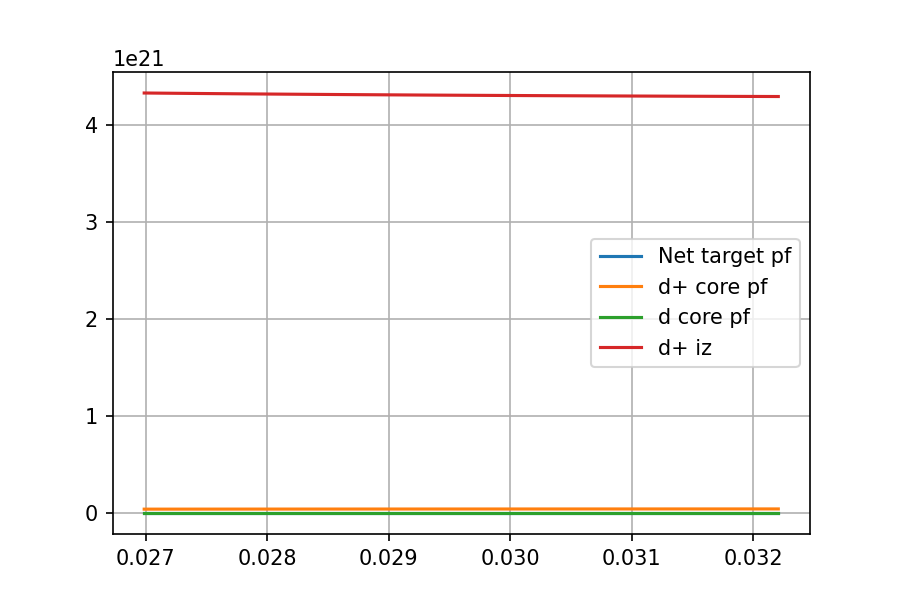

In [209]:
plt.close("all")

fig, ax = plt.subplots(figsize=(6,4), dpi = 150)

t = ds.coords["t"]
pf_target_net = np.sum([pf["d+"][x] for x in m["targets"]], axis = 0) - np.sum([pf["d"][x] for x in m["targets"]], axis = 0)

ax.plot(t, pf_target_net, label = "Net target pf")
ax.plot(t, pf["d+"]["core"].values, label = "d+ core pf")
ax.plot(t, pf["d"]["core"].values, label = "d core pf")
ax.plot(t, pf["d+"]["iz"].values, label = "d+ iz")
# ax.plot(t, pf["d"]["core"].values, label = "d core pf")

ax.grid()
ax.set_yscale("linear")
ax.legend()

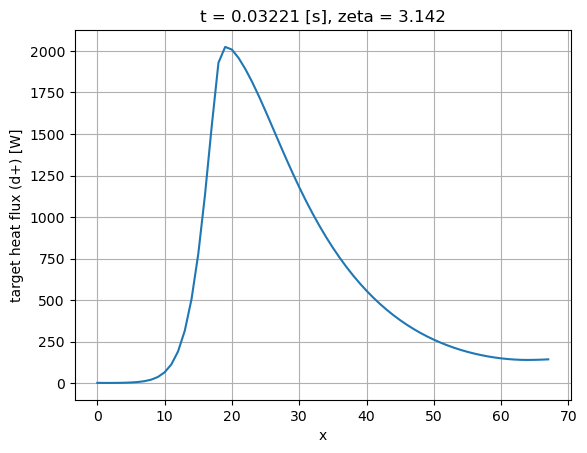

In [19]:
fig, ax = plt.subplots()

(ds["hf_outer_lower_d+"]*-1).isel(t=-1).plot(ax = ax)
ax.grid()

In [ ]:
"""
Power in through X inner Pin = 162418.93698190025 W  [55238.53718922597 ion 107180.39979267426 electron]
Power out through X outer Pout,x 0.0 W [0.0 ion 0.0 electron]
Power out through lower sheath: Pout,d = 41805.580325914736 W [25543.116778984073 ion 16262.463546930667 electron]
Power out through upper sheath: Pout,u = 85927.55896679485 W [40862.03993701901 ion 45065.51902977584 electron]
Domain volume: 0.44588748805918543 m^3
Thermal energy content: 49.51050515563746 J
Energy confinement time: 0.00030483209701806415 s
Net power radiation: Prad = 26396.319077657958 W [26395.075399576534 excitation 1.2436780814237998 recombination]
Net input power Pnet = Pin - Pout,x - Pout,d - Pout,u - Prad = 8289.4786115327 W
------------
Particle flux in through X inner: 4.149953576517765e+19 /s
Particle flux out through X outer: 0.0 /s
Particle flux to lower sheath: 2.0381675806634667e+21 /s
Particle flux to upper sheath: 2.2985141232757716e+21 /s
Recycling fraction: 0.990430578354994
Total ionization rate: 4.290451033846074e+21 /s
Total recombination rate: -2.5038401874305984e+17 /s
Particle content: 2.169621801152505e+18
Particle throughput time: 0.05228062823230518 s
------------
"""

In [148]:
(domain["Rd+_ex"] * domain["dv"]).sum(["x", "theta"]).values

array(-17596.71677929)

In [142]:
target_indices = dict()
target_indices["lower_inner"] = dict(y = 0, y2 = 1, yg = None)
target_indices["lower_outer"] = dict(y = -1, y2 = -2, yg = None)
target_indices["upper_inner"] = dict(y = m["ny_inner"], y2 = m["ny_inner"]-1, yg = None)
target_indices["upper_outer"] = dict(y = m["ny_inner"]+1, y2 = m["ny_inner"]+2, yg = None)

target = "lower_outer"
idx = target_indices[target]

hf_e, hf_i,  pf_i = sheath_boundary_simple(ds, "d+", target = target)
print()
print("{}: {} W [{} ion {} electron]".format(
    target,
    (hf_e+hf_i).isel(x=slice(2,-2)).values.sum(),
    hf_i.isel(x=slice(2,-2)).values.sum(),
    hf_e.isel(x=slice(2,-2)).values.sum(),
))


lower_outer: 85927.55896679484 W [40862.03993701901 ion 45065.51902977582 electron]


In [134]:
# bd = bd.isel(t=-1)
gamma_e = bd.options['sheath_boundary_simple']['gamma_e']
gamma_i = bd.options['sheath_boundary_simple']['gamma_i']
Ne = bd["Ne"]
Te = bd["Te"]
Ti = bd["Td+"]
yboundaries = bd.metadata["keep_yboundaries"]

sheath_down_e, sheath_up_e, sheath_down_i, sheath_up_i, sheath_flow_down, sheath_flow_up = sheath_boundary_simple_original(
    bd, gamma_e, gamma_i, Ne, Te, Ti, AA = 2)

print()
print("{}: {} W [{} ion {} electron]".format(
    target,
    (sheath_up_e + sheath_up_i).isel(x=slice(2,-2)).values.sum(),
    sheath_up_i.isel(x=slice(2,-2)).values.sum(),
    sheath_up_e.isel(x=slice(2,-2)).values.sum(),
))


lower_inner: 85927.55896679484 W [40862.03993701901 ion 45065.51902977583 electron]


In [ ]:
"""
lower inner: Pout,d = 41805.580325914736 W [25543.116778984073 ion 16262.463546930667 electron]
lower outer: Pout,u = 85927.55896679485 W [40862.03993701901 ion 45065.51902977584 electron]
"""

In [53]:
flux_e, flux_i, ions = sheath_boundary_simple(case.ds, "d+", 
                                              first_domain_cell_index = 0,
                                              guard_cell_index = None)

In [80]:
case.ds = calculate_target_fluxes(case.ds)